In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load the Dataset

In [2]:
df_c = pd.read_csv('company_info.csv')
df_m = pd.read_csv('market_indices.csv')
df_s = pd.read_csv('stock_prices.csv')
df_i = pd.read_csv('stock_prices_with_indicators.csv')

In [3]:
df_c.head()

ticker company_name      sector    ipo_date
0  STK001     TechCorp  Technology  2021-04-10
1  STK002  DataSystems  Technology  2016-10-12
2  STK003    CloudNine  Technology  2016-01-18
3  STK004  CyberShield  Technology  2022-02-21
4  STK005    MediPharm  Healthcare  2018-03-05

In [4]:
df_c['sector'].unique()

array(['Technology', 'Healthcare', 'Finance', 'Consumer', 'Energy'],
      dtype=object)

In [5]:
df_m.head()

date  sp500_close  nasdaq_close  vix_close  treasury_10y  \
0  2021-01-04      3891.04      12952.02      20.48         1.496   
1  2021-01-05      3847.20      13116.52      19.89         1.504   
2  2021-01-06      3878.24      12818.48      20.02         1.507   
3  2021-01-07      3803.95      13290.11      19.59         1.498   
4  2021-01-08      3715.64      13365.73      20.14         1.498   

   dollar_index market_regime  
0         90.07          bull  
1         90.73          bull  
2         90.46          bull  
3         90.67          bull  
4         90.64          bull

In [6]:
df_s.head()

ticker        date    open    high     low   close   volume  adjusted_close
0  STK001  2021-01-04  158.09  160.97  158.09  160.11   962644          160.11
1  STK001  2021-01-05  163.16  165.50  160.76  162.36  1312685          162.36
2  STK001  2021-01-06  161.89  162.51  160.94  161.78  1449177          161.78
3  STK001  2021-01-07  163.33  167.90  163.33  167.07  1534833          167.07
4  STK001  2021-01-08  168.20  168.20  164.12  165.68   848261          165.68

In [7]:
df_i.head()

ticker        date    open    high     low   close     volume  \
0  STK001  2021-01-04  158.09  160.97  158.09  160.11   962644.0   
1  STK001  2021-01-05  163.16  165.50  160.76  162.36  1312685.0   
2  STK001  2021-01-06  161.89  162.51  160.94  161.78  1449177.0   
3  STK001  2021-01-07  163.33  167.90  163.33  167.07  1534833.0   
4  STK001  2021-01-08  168.20  168.20  164.12  165.68   848261.0   

   adjusted_close      sma_20      sma_50  ...  true_range  atr_14  \
0          160.11  160.110000  160.110000  ...        2.88   2.880   
1          162.36  161.235000  161.235000  ...        5.39   4.135   
2          161.78  161.416667  161.416667  ...        1.57   3.280   
3          167.07  162.830000  162.830000  ...        6.12   3.990   
4          165.68  163.400000  163.400000  ...        4.08   4.008   

   volume_sma_20  volume_ratio  momentum_10  momentum_20  price_to_sma_50  \
0      962644.00      1.000000          NaN          NaN         0.000000   
1     1137664.50      1.153842          NaN          NaN         0.006977   
2     1241502.00      1.167277          NaN          NaN         0.002251   
3     1314834.75      1.167320          NaN          NaN         0.026039   
4     1221520.00      0.694431          NaN          NaN         0.013953   

   volatility_20  future_return_5d  trend_label  
0            NaN          0.026357      Uptrend  
1            NaN          0.018169     Sideways  
2       0.012463         -0.012301     Sideways  
3       0.018138         -0.061950    Downtrend  
4       0.018663         -0.070196    Downtrend  

[5 rows x 31 columns]

### To confirm that the data covers all ticker

In [8]:
df_s['ticker'].nunique()

20

In [9]:
df_i['ticker'].nunique()

20

#### To ensure date is in pandas time

In [10]:
df_c['date'] = pd.to_datetime(df_c['ipo_date'])
df_m['date'] = pd.to_datetime(df_m['date'])
df_s['date'] = pd.to_datetime(df_s['date'])
df_i['date'] = pd.to_datetime(df_i['date'])

### To handle missing values

In [11]:
df_i = df_i.groupby('ticker', group_keys=False).apply(lambda x: x.ffill())
df_i = df_i.groupby('ticker', group_keys=False).apply(lambda x: x.bfill())

# To clip the data so that all ticker have same end date (stk012 and stk014)
df_i = df_i[df_i['date'] <= '22-12-2023']

C:\Users\estee\AppData\Local\Temp\ipykernel_30744\85920685.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_i = df_i.groupby('ticker', group_keys=False).apply(lambda x: x.ffill())
C:\Users\estee\AppData\Local\Temp\ipykernel_30744\85920685.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_i = df_i.groupby('ticker', group_keys=False).apply(lambda x: x.bfill())


In [12]:
df_i['date'].max()

Timestamp('2023-12-22 00:00:00')

#### To join stock price table with company inf0

In [13]:
df_coy_stock = df_s.merge(df_c, on='ticker', how='left')

In [18]:
# To confirm success

df_coy_stock.head()

ticker     date_x    open    high     low   close   volume  adjusted_close  \
0  STK001 2021-01-04  158.09  160.97  158.09  160.11   962644          160.11   
1  STK001 2021-01-05  163.16  165.50  160.76  162.36  1312685          162.36   
2  STK001 2021-01-06  161.89  162.51  160.94  161.78  1449177          161.78   
3  STK001 2021-01-07  163.33  167.90  163.33  167.07  1534833          167.07   
4  STK001 2021-01-08  168.20  168.20  164.12  165.68   848261          165.68   

  company_name      sector    ipo_date     date_y  
0     TechCorp  Technology  2021-04-10 2021-04-10  
1     TechCorp  Technology  2021-04-10 2021-04-10  
2     TechCorp  Technology  2021-04-10 2021-04-10  
3     TechCorp  Technology  2021-04-10 2021-04-10  
4     TechCorp  Technology  2021-04-10 2021-04-10

In [15]:
df_coy_stock.isnull().sum()

ticker            0
date_x            0
open              0
high              0
low               0
close             0
volume            0
adjusted_close    0
company_name      0
sector            0
ipo_date          0
date_y            0
dtype: int64

In [16]:
df_coy_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15600 entries, 0 to 15599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ticker          15600 non-null  object        
 1   date_x          15600 non-null  datetime64[ns]
 2   open            15600 non-null  float64       
 3   high            15600 non-null  float64       
 4   low             15600 non-null  float64       
 5   close           15600 non-null  float64       
 6   volume          15600 non-null  int64         
 7   adjusted_close  15600 non-null  float64       
 8   company_name    15600 non-null  object        
 9   sector          15600 non-null  object        
 10  ipo_date        15600 non-null  object        
 11  date_y          15600 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


**IPO Validation**

In [19]:
# Check IPO date vs first trading date per ticker
ipo_check = (
    df_coy_stock.groupby('ticker')
    .agg(ipo_date=('ipo_date', 'first'),
         first_trade=('date_x', 'min'))
    .assign(valid=lambda x: x['ipo_date'] <= x['first_trade'])
)

ipo_check

ipo_date first_trade  valid
ticker                               
STK001  2021-04-10  2021-01-04  False
STK002  2016-10-12  2021-01-04   True
STK003  2016-01-18  2021-01-04   True
STK004  2022-02-21  2021-01-04  False
STK005  2018-03-05  2021-01-04   True
STK006  2017-12-01  2021-01-04   True
STK007  2017-09-25  2021-01-04   True
STK008  2017-01-08  2021-01-04   True
STK009  2022-02-06  2021-01-04  False
STK010  2016-09-15  2021-01-04   True
STK011  2021-08-04  2021-01-04  False
STK012  2022-02-19  2021-01-04  False
STK013  2020-06-22  2021-01-04   True
STK014  2016-07-29  2021-01-04   True
STK015  2020-11-09  2021-01-04   True
STK016  2019-06-04  2021-01-04   True
STK017  2016-02-08  2021-01-04   True
STK018  2016-02-02  2021-01-04   True
STK019  2016-08-19  2021-01-04   True
STK020  2017-09-11  2021-01-04   True

In [ ]:
# Count valid vs invalid IPOs
ipo_counts = ipo_check['valid'].value_counts().rename({True: 'Valid', False: 'Invalid'})

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=ipo_counts.index, y=ipo_counts.values, palette=['#2ecc71', '#e74c3c'])
plt.title('IPO Date Validation - Company Listing vs First Trading Date', fontsize=12)
plt.ylabel('Number of Companies')
plt.xlabel('IPO Date Alignment')
plt.xticks(fontsize=10)

plt.tight_layout()
plt.show()

In [20]:
# Get invalid tickers
invalid_tickers = ipo_check[ipo_check['valid'] == False].index.tolist()

# Count how many rows of df_coy_stock belong to those tickers
affected_rows = df_coy_stock[df_coy_stock['ticker'].isin(invalid_tickers)].shape[0]

# Total proportion of affected data
total_rows = df_coy_stock.shape[0]
percent_affected = round((affected_rows / total_rows) * 100, 2)

print(f"Affected tickers: {invalid_tickers}")
print(f"Total affected rows: {affected_rows} ({percent_affected}%) of dataset")

Affected tickers: ['STK001', 'STK004', 'STK009', 'STK011', 'STK012']
Total affected rows: 3900 (25.0%) of dataset


In [22]:
# List of invalid tickers (from IPO validation)
invalid_tickers = ipo_check[ipo_check['valid'] == False].index.tolist()

# Filter the merged dataset (df_coy_stock)
affected_companies = (
    df_coy_stock[df_coy_stock['ticker'].isin(invalid_tickers)]
    .groupby(['ticker', 'company_name', 'sector', 'ipo_date'], as_index=False)
    .agg(first_trade=('date_x', 'min'),
         total_records=('ticker', 'count'))
    .sort_values('ticker')
)

affected_companies

ticker company_name      sector    ipo_date first_trade  total_records
0  STK001     TechCorp  Technology  2021-04-10  2021-01-04            780
1  STK004  CyberShield  Technology  2022-02-21  2021-01-04            780
2  STK009  CapitalBank     Finance  2022-02-06  2021-01-04            780
3  STK011    FinSecure     Finance  2021-08-04  2021-01-04            780
4  STK012  WealthGroup     Finance  2022-02-19  2021-01-04            780

### Observation of Findings

Out of 20 companies, 5 (25%) show IPO dates occurring after their recorded first trading day (an impossible sequence in real markets).
- Total affected records: 3,900 (~ 25% of the dataset)
- Sectors impacted: Primarily Technology (2 firms) and Finance (3 firms). No anomalies in Healthcare, Energy, or Consumer sectors.
- First trade date (common): 2021-01-04 across all tickers.

Approximately one-quarter of the dataset reflects IPO-date misalignments, likely due to placeholder or synthetic IPO entries rather than true market errors.
Because IPO timing doesn’t influence indicator or return computations, these records are retained for Phase 1 EDA but will be flagged for correction or exclusion before IPO-based or lifecycle modeling.
This ensures analytical continuity while maintaining transparency on data integrity issues.

### Summary Descriptive Statistics Table

In [23]:
df_m.describe()

date  sp500_close  nasdaq_close  vix_close  \
count                            780   780.000000    780.000000  780.00000   
mean   2022-07-02 12:00:00.000000256  3485.084885   6673.511333   14.64359   
min              2021-01-04 00:00:00  2714.770000   4929.830000   10.00000   
25%              2021-10-03 06:00:00  3105.597500   5873.635000   11.31000   
50%              2022-07-02 12:00:00  3500.035000   6299.155000   13.47500   
75%              2023-03-31 18:00:00  3826.580000   6875.302500   17.07500   
max              2023-12-29 00:00:00  4410.970000  13559.930000   27.65000   
std                              NaN   428.987672   1543.810287    4.11082   

       treasury_10y  dollar_index  
count    780.000000    780.000000  
mean       2.254446     92.231667  
min        1.370000     88.270000  
25%        1.872250     91.110000  
50%        2.402000     92.220000  
75%        2.595500     93.282500  
max        2.828000     96.630000  
std        0.419326      1.712658

### Observation of Findings

The dataset contains 780 observations of key market indicators.

- S&P 500: Mean ~ 3,485, ranging from 2,715 to 4,411, with a std ~ 429, showing steady growth with moderate volatility.

- NASDAQ: Mean ~ 6,674, range 4,929 – 13,560, std ~ 1,543, reflecting stronger tech-sector swings and higher volatility.

- VIX (Volatility Index): Average 14.6, peaking at 27.6, suggesting generally calm markets punctuated by short volatility spikes.

- 10-Year Treasury Yield: Mean 2.25 %, varying narrowly between 1.37 % – 2.83 %, indicating a stable rate environment.

- Dollar Index: Mean 92.23, with a tight spread (std ~ 1.7) and range 88.27 – 96.63, showing limited currency fluctuation.

Overall, the indices reflect a moderately volatile but stable macro environment, consistent with normal market cycles

In [24]:
df_s.describe()

date          open          high           low  \
count                15600  15600.000000  15600.000000  15600.000000   
mean   2022-07-02 12:00:00    102.567353    104.372648    100.843603   
min    2021-01-04 00:00:00     21.060000     22.080000     21.060000   
25%    2021-10-03 06:00:00     63.350000     64.437500     62.245000   
50%    2022-07-02 12:00:00     88.630000     90.200000     87.245000   
75%    2023-03-31 18:00:00    131.302500    133.215000    129.002500   
max    2023-12-29 00:00:00    512.090000    517.100000    497.210000   
std                    NaN     58.873297     59.972069     57.872533   

              close        volume  adjusted_close  
count  15600.000000  1.560000e+04    15600.000000  
mean     102.609313  1.245900e+06      102.609313  
min       21.440000  8.018930e+05       21.440000  
25%       63.340000  1.068706e+06       63.340000  
50%       88.735000  1.249378e+06       88.735000  
75%      131.160000  1.420604e+06      131.160000  
max      514.520000  2.080627e+06      514.520000  
std       58.946467  2.160269e+05       58.946467

### Observation of Findings

The dataset comprises 15,600 daily observations across all five sectors.

- Average Open/Close Price: ~ $102.6

- Price Range: $21.4 – $514.5

- Standard Deviation: ~ $58.9, indicating wide price variability across stocks

- Average Daily Volume: ~ 1.25 million shares, with a high spread (std ~ 2.1 million) showing mixed liquidity levels.

Overall, the data reflects a diverse cross-section of stocks with varying price levels and trading activity

In [25]:
df_i.describe()

date          open          high  \
count                          15500  15500.000000  15500.000000   
mean   2022-06-29 00:00:00.000000256    102.402273    104.203083   
min              2021-01-04 00:00:00     21.060000     22.080000   
25%              2021-09-30 00:00:00     63.350000     64.427500   
50%              2022-06-29 00:00:00     88.535000     90.090000   
75%              2023-03-28 00:00:00    131.037500    132.952500   
max              2023-12-22 00:00:00    512.090000    516.020000   
std                              NaN     58.524262     59.610023   

                low         close        volume  adjusted_close        sma_20  \
count  15500.000000  15500.000000  1.550000e+04    15500.000000  15500.000000   
mean     100.678979    102.440757  1.255792e+06      102.440757    102.021710   
min       21.060000     21.440000  8.018930e+05       21.440000     22.808000   
25%       62.230000     63.330000  1.069122e+06       63.330000     62.953375   
50%       87.150000     88.650000  1.249761e+06       88.650000     88.059500   
75%      128.850000    130.962500  1.420746e+06      130.962500    130.368500   
max      497.210000    509.110000  1.399696e+07      509.110000    489.384000   
std       57.519649     58.582810  3.880643e+05       58.582810     57.436184   

             sma_50       sma_200  ...      bb_width    true_range  \
count  15500.000000  15500.000000  ...  15500.000000  15500.000000   
mean     101.362911     99.072600  ...     16.265683      3.730865   
min       23.391200     25.758150  ...      0.113137      0.270000   
25%       64.066550     66.670504  ...      7.922109      1.870000   
50%       87.812800     86.853650  ...     12.316123      2.970000   
75%      130.118450    127.884325  ...     19.910977      4.620000   
max      470.320200    383.890800  ...    124.994567     39.530000   
std       55.625281     49.002160  ...     13.650653      2.903840   

             atr_14  volume_sma_20  volume_ratio   momentum_10   momentum_20  \
count  15500.000000   1.550000e+04  15500.000000  15500.000000  15500.000000   
mean       3.718210   1.245799e+06      1.000151      0.005238      0.010649   
min        0.650000   8.854700e+05      0.608932     -0.283947     -0.417187   
25%        2.158571   1.207039e+06      0.864143     -0.041949     -0.058287   
50%        3.128214   1.243692e+06      1.001186      0.004554      0.009533   
75%        4.653571   1.282470e+06      1.131873      0.051693      0.077867   
max       19.738571   1.578011e+06      1.574700      0.370482      0.669193   
std        2.330761   5.659303e+04      0.167655      0.075632      0.108171   

       price_to_sma_50  volatility_20  future_return_5d  
count     15500.000000   15500.000000      15500.000000  
mean          0.007691       0.022961          0.002496  
min          -0.376681       0.001749         -0.220991  
25%          -0.050584       0.017960         -0.030736  
50%           0.007041       0.021978          0.002061  
75%           0.068666       0.026913          0.035707  
max           0.427233       0.065473          0.245885  
std           0.096459       0.007082          0.053231  

[8 rows x 29 columns]

### Observation of Findings

The dataset contains 15,500 daily records across all tickers with 28 engineered indicators.

**Volatility Indicators:**

- Average ATR (14-day): ~ 3.72 indicating moderate daily price range.

- Bollinger Band Width ~ 16.3, indicating varied volatility across tickers.

**Momentum Metrics:**

- Momentum 10 mean ~ 0.005, Momentum 20 mean ~ 0.011, reflecting generally mild upward momentum.

**Volume Activity:**

- Average Daily Volume: ~ 1.26 million shares; Volume Ratio ~ 1.00, suggesting typical trading consistency.

**Short-Horizon Returns:**

- 5-Day Future Return mean ~ 0.0025 (0.25 %), implying small but steady forward movement.

Overall, the statistics show a stable, moderately volatile market with realistic momentum and volume behavior

### 1. Price Trend Analysis

#### A. Plot closing prices for 5 different stocks (one from each sector)

In [26]:
# closing prices for 5 different stocks (one from each sector)

# To select one stock per sector
sample_tickers = (
    df_coy_stock.groupby('sector')['ticker']
    .first()
    .tolist()
)

print("Selected tickers by sector:", sample_tickers)

Selected tickers by sector: ['STK013', 'STK017', 'STK009', 'STK005', 'STK001']


In [28]:
 # To plot closing prices for those tickers

for ticker in sample_tickers:
    # To filter the dataset for this stock
    stock_data = df_coy_stock[df_coy_stock['ticker'] == ticker]

    # Create the line plot
    plt.figure(figsize=(10, 4))
    plt.plot(stock_data['date_x'], stock_data['close'], color='green', linewidth=2)

    # Add titles and labels
    sector = stock_data['sector'].iloc[0]
    plt.title(f"{ticker} — {sector} Sector | Closing Price Trend (2021–2023)", fontsize=12)
    plt.xlabel("Date")
    plt.ylabel("Closing Price ($)")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

### Observation of Findings

- Technology (STK001): Displays a strong upward trajectory with steady growth and moderate pullbacks — characteristic of innovation-driven companies benefiting from post-pandemic digital expansion.

- Finance (STK009): Shows a prolonged stable phase followed by a sharp appreciation toward 2023, reflecting financial-sector recovery and interest-rate influences.

- Healthcare (STK005): Moves within a narrower band, signaling defensive stability and consistent performance regardless of market fluctuations.

- Energy (STK017): Exhibits pronounced cyclical swings — periodic rises and corrections that mirror global oil and commodity price movements.

- Consumer (STK013): Reveals gradual, demand-driven growth with minor corrections, consistent with evolving spending trends and consumer resilience.

 Overall, across all sectors, prices generally trend upward toward late 2022 – 2023, suggesting broad market recovery and sector rotation. Technology and Finance lead the gains, while Healthcare remains stable and Energy shows the highest volatility.

In [29]:
# To better understand collective sector performance, we also aggregated closing prices by sector to visualize overall trends.

df = df_coy_stock.copy()

# Group by sector and date
sector_trend = (
    df.groupby(['sector', 'date_x'], as_index=False)['close']
      .mean()
      .rename(columns={'close': 'sector_close_mean'})
)

# Plot: one line per sector
plt.figure(figsize=(11,5))
for s in sector_trend['sector'].unique():
    sub = sector_trend[sector_trend['sector'] == s]
    plt.plot(sub['date_x'], sub['sector_close_mean'], label=s, linewidth=2)

plt.title('Sector-Level Average Closing Price Trends (2021–2023)')
plt.xlabel('Date')
plt.ylabel('Average Closing Price (Stocks Average)')
plt.legend(title='Sector')
plt.grid(True)

plt.tight_layout()
plt.show()

### Observation of Findings

The chart depicts the average daily closing prices of all stocks within each sector, revealing clear distinctions in performance and volatility patterns across the 2021–2023 period.

- All sectors exhibit an overall upward trend toward 2023, indicating broad-based market recovery.

- Technology and Finance lead in growth and price magnitude, while Healthcare and Consumer remain stable.

- Energy’s fluctuations highlight its sensitivity to external economic factors, such as inflation and supply chain shocks.

#### B. Identify uptrends, downtrends, and sideways periods visually

In [30]:
df_i['trend_label'].unique()

array(['Uptrend', 'Sideways', 'Downtrend'], dtype=object)

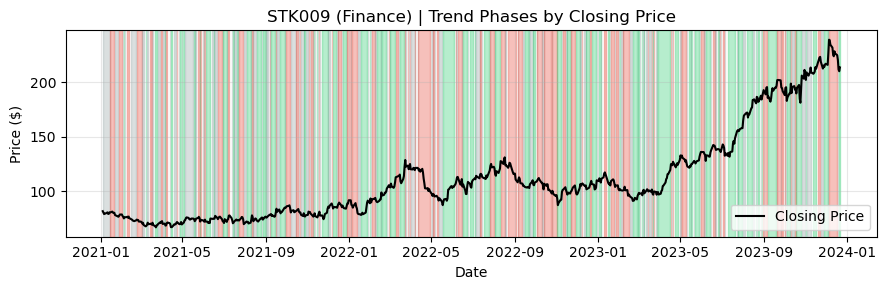

In [31]:
# To pick one ticker per sector
sample_pairs = df_c.groupby('sector')['ticker'].first().reset_index()

# defining colors for trend label
colors = {'Uptrend': '#2ecc71', 'Downtrend': '#e74c3c', 'Sideways': '#95a5a6'}

# loop through each selected ticker
for _, row in sample_pairs.iterrows():
    t = row['ticker']
    s = row['sector']
    sub = df_i[df_i['ticker'] == t].sort_values('date')
    
    plt.figure(figsize=(9,3))
    plt.plot(sub['date'], sub['close'], color='black', lw=1.5, label='Closing Price')
    
    # shade trend areas
    groups = (sub['trend_label'] != sub['trend_label'].shift()).cumsum()
    for _, seg in sub.groupby(groups):
        tr = seg['trend_label'].iloc[0]
        plt.axvspan(seg['date'].iloc[0], seg['date'].iloc[-1],
                    color=colors.get(tr, 'white'), alpha=0.35)
    
    plt.title(f"{t} ({s}) | Trend Phases by Closing Price")
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### Observation of Findings

 **Consumer Sector – STK013**

- Frequent alternation between green and red bands showing a volatile pattern.

- Prices mostly ranged between 60 – 110 USD indicating a sideways-biased movement with periodic surges.

**Energy Sector – STK017**

- Noticeable long red stretches in 2021 followed by extended green periods in 2023.

- Reflects global energy price fluctuations - strong cyclical behavior.

**Finance Sector – STK009**

- Sustained green band from mid-2022 onward.

- Shows a clear, stable uptrend reflecting sectoral recovery and steady investor confidence.

**Healthcare Sector – STK005**

- Alternating moderate red/green zones with long neutral spans (gray).

- Indicates resilient but range-bound behavior, typical of defensive stocks.

**Technology Sector – STK001**

- Extended green phases and steep price rise toward 2023 (> $500).

- Confirms a dominant bullish trend, reflecting sustained sector momentum.

Overall, the market shows:

- Broad upward bias in most sectors, especially Technology and Finance.

- Energy volatility aligning with external commodity factors.

- Healthcare and Consumer sectors exhibiting steady but less aggressive growth.

- Trend labels visually clarify how each stock transitioned between bullish, bearish, and neutral phases.

#### C. Calculate basic statistics: mean, median, std dev of returns

In [32]:
# Compute mean, median, std for selected tickers (and include sector)

sample_tickers = ['STK001', 'STK005', 'STK009', 'STK013', 'STK017']

price_stats = ( 
    df_coy_stock[df_coy_stock['ticker'].isin(sample_tickers)]
    .groupby(['ticker', 'sector'])['close']
    .agg(['mean', 'median', 'std'])
    .reset_index()
    .round(2)
)

display(price_stats)

ticker      sector    mean  median     std
0  STK001  Technology  230.96  181.80  107.22
1  STK005  Healthcare   84.02   84.62   14.72
2  STK009     Finance  111.35  101.40   41.03
3  STK013    Consumer   84.28   84.12   17.07
4  STK017      Energy   60.82   59.70   14.93

### Observation of Findings

Across the five representative stocks: 

- Technology (STK001) showed the highest mean price (~ $231) and volatility (std ~ 107dollars), reflecting strong but unstable growth. 

- Finance (STK009) followed with moderate volatility characterized with cyclical but resilient movement (std ~ $41) 

- Healthcare (STK005) and Consumer (STK013) traded around 84 dollars with steadier performance and relatively low volatility (std ~ $15–17). 

- Energy (STK017) had the lowest and most stable price range (mean ~ 61dollars, std ~ $15). 

Overall, Technology and Finance exhibited greater price dynamism, whereas Consumer, Healthcare, and Energy remained comparatively stable.

### 2. Sector Comparison

#### A. Calculate average returns by sector

In [33]:
# calculate daily returns per ticker
df_returns = (
    df_i.sort_values(['ticker', 'date'])
        .assign(return_pct = df_i.groupby('ticker')['close'].pct_change() * 100)
)

# basic statistics by sector
return_stats = (
    df_returns.merge(df_c[['ticker','sector']], on='ticker', how='left')
              .groupby('sector')['return_pct']
              .agg(['mean','median', 'std'])
              .round(4)
              .reset_index()
)

# Format values with % sign for readability
return_stats_display = return_stats.copy()
return_stats_display[['mean', 'median', 'std']] = return_stats_display[['mean', 'median', 'std']].map(lambda x: f"{x:.2f}%")

display(return_stats_display)


sector   mean median    std
0    Consumer  0.06%  0.07%  1.85%
1      Energy  0.04%  0.12%  3.10%
2     Finance  0.07%  0.09%  2.29%
3  Healthcare  0.05%  0.00%  2.07%
4  Technology  0.05%  0.05%  2.51%

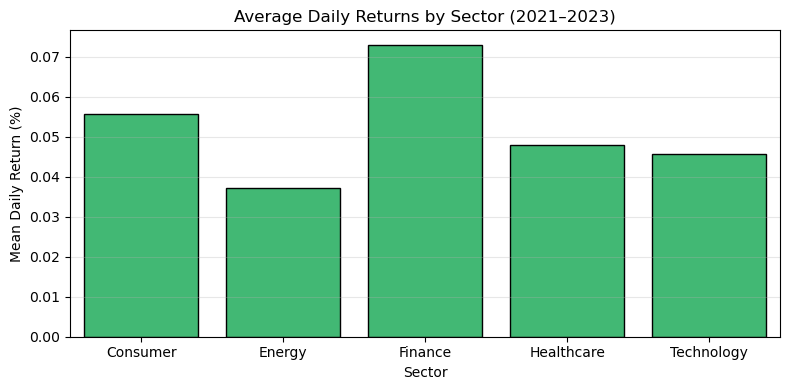

In [34]:
# To graphically represent it

# Average Daily Returns
plt.figure(figsize=(8,4))
sns.barplot(data=return_stats, x='sector', y='mean', color='#2ecc71', edgecolor='black')
plt.title('Average Daily Returns by Sector (2021–2023)')
plt.xlabel('Sector')
plt.ylabel('Mean Daily Return (%)')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Observation of Findings

The analysis of sector-level returns shows that Finance led performance with the highest average daily return of 0.07%, followed by Consumer (0.06%), while Energy delivered the lowest return at 0.04%. However, return consistency varied notably across sectors.

#### B. Compare volatility across sectors

In [35]:
# calculate standard deviation per ticker

df_returns = (
    df_i.sort_values(['ticker', 'date'])
        .assign(return_pct = df_i.groupby('ticker')['close'].pct_change() * 100)
)

# basic statistics by sector
return_stats = (
    df_returns.merge(df_c[['ticker','sector']], on='ticker', how='left')
              .groupby('sector')['return_pct']
              .agg(['std'])
              .round(4)
              .reset_index()
)

# Format values with % sign for readability
return_stats_display = return_stats.copy()
return_stats_display[['std']].map(lambda x: f"{x:.2f}%")

display(return_stats_display)

sector     std
0    Consumer  1.8520
1      Energy  3.1006
2     Finance  2.2869
3  Healthcare  2.0734
4  Technology  2.5141

In [36]:
# To graphically represent Volatility (Standard Deviation)

plt.figure(figsize=(8,4))
sns.barplot(data=return_stats, x='sector', y='std', color='#e74c3c', edgecolor='black')
plt.title('Volatility (Standard Deviation of Returns) by Sector')
plt.xlabel('Sector')
plt.ylabel('Volatility (Std %)')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Observation of Findings

In terms of risk, measured by standard deviation of returns, Energy exhibited the highest volatility (3.10%), suggesting larger daily price swings and greater uncertainty. Technology and Finance followed with moderate volatility levels of 2.51% and 2.29%, respectively. Meanwhile, Consumer and Healthcare sectors maintained relatively stable behavior with the lowest volatility, at 1.85% and 2.07%.

Overall from the daily average return and volatility, Finance provided the best risk-return trade-off, combining strong average gains with manageable volatility, whereas Energy appeared riskier despite its weaker mean performance.

#### C. Visualize sector performance with box plots

C:\Users\estee\AppData\Local\Temp\ipykernel_30744\3341758779.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_i_merged, x='sector', y='return_pct', palette="Set2")


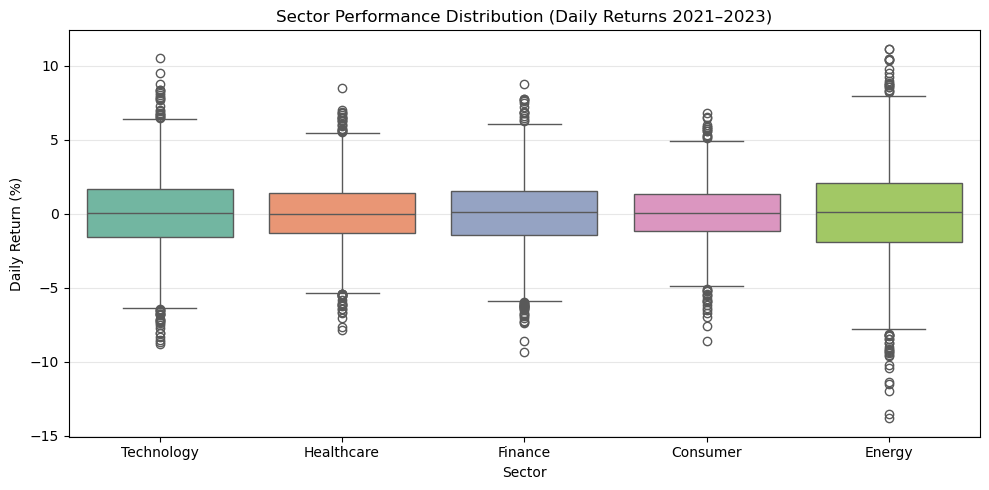

In [37]:
#Merging compant info data with stock indaicator

df_i_merged = df_i.merge(df_c[['ticker', 'sector']], on='ticker', how='left')

# Ensure daily return column exists (if not already computed)
if 'return_pct' not in df_i_merged.columns:
    df_i_merged = df_i_merged.sort_values(['ticker', 'date'])
    df_i_merged['return_pct'] = df_i_merged.groupby('ticker')['close'].pct_change() * 100

# Plot sector performance using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=df_i_merged, x='sector', y='return_pct', palette="Set2")

plt.title('Sector Performance Distribution (Daily Returns 2021–2023)')
plt.xlabel('Sector')
plt.ylabel('Daily Return (%)')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### Observation of Findings

Energy and Technology display the widest spread of returns and several outliers, revealing higher volatility and more frequent extreme movements. Finance shows a moderately wide range, suggesting cyclical yet balanced risk-reward behavior. In contrast, Healthcare and Consumer sectors have narrower boxes and fewer outliers, indicating steadier, lower-risk performance.

Overall, the visualization highlights that growth-oriented sectors (Energy, Technology) are more volatile, while defensive sectors (Healthcare, Consumer) maintain consistent returns with reduced downside risk.

### 3. Volume Analysis

#### A. Plot volume patterns over time

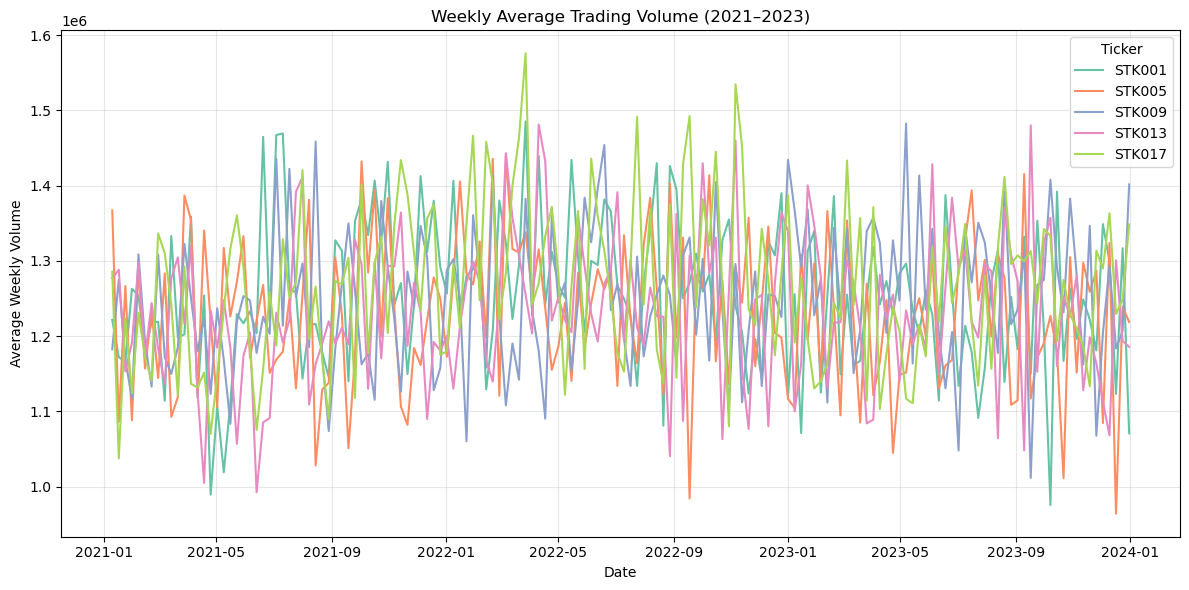

In [39]:
# Pick sample tickers (one per sector)

# Ensure date is datetime
df_s['date'] = pd.to_datetime(df_s['date'])

sample_tickers = ['STK001', 'STK005', 'STK009', 'STK013', 'STK017']
df_vol = df_s[df_s['ticker'].isin(sample_tickers)]

# Aggregate weekly (you can switch to 'M' for monthly)
df_vol_weekly = (
    df_vol.groupby(['ticker', pd.Grouper(key='date', freq='W')])['volume']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df_vol_weekly, x='date', y='volume', hue='ticker', palette='Set2')
plt.title('Weekly Average Trading Volume (2021–2023)')
plt.xlabel('Date')
plt.ylabel('Average Weekly Volume')
plt.grid(alpha=0.3)
plt.legend(title='Ticker')

plt.tight_layout()
plt.show()

### Observation of Findings

Weekly averages ranged between 1.1M–1.4M shares, showing steady mid-term liquidity across all sectors. Short-term spikes in mid-2021 and early-2022 suggest event-driven trading surges, while brief dips around mid-2022 likely reflect seasonal or macro slowdowns. Overall, activity remained balanced, indicating consistent investor engagement across sectors.

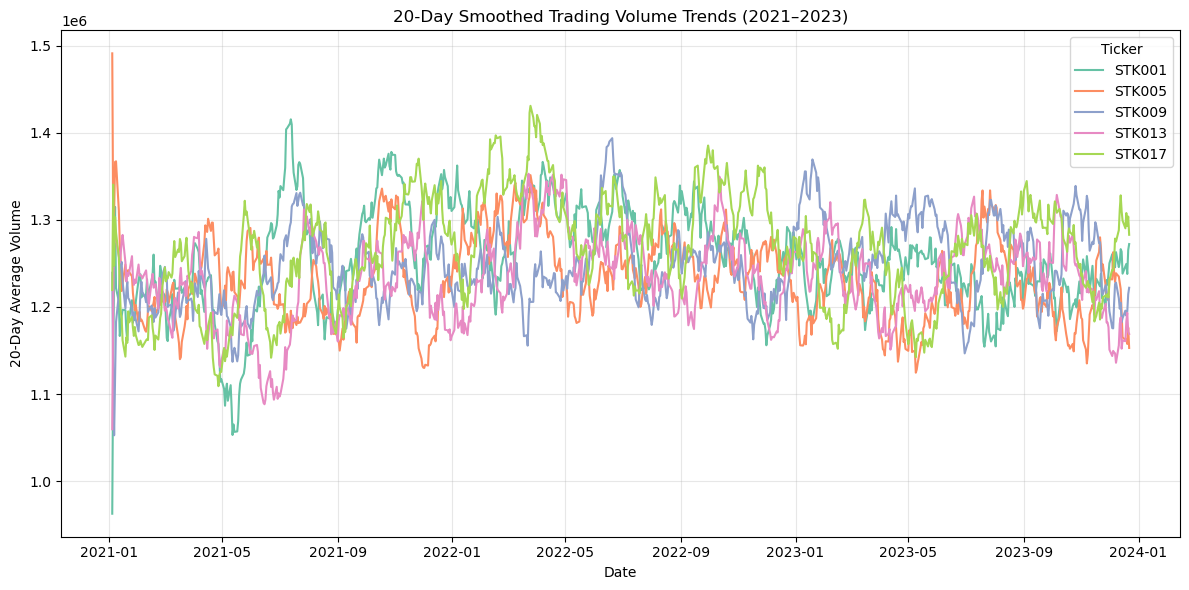

In [44]:
# Pick one ticker per sector (same as before)
sample_tickers = ['STK001', 'STK005', 'STK009', 'STK013', 'STK017']
df_vol = df_i[df_i['ticker'].isin(sample_tickers)]

# Plot using the smoothed volume already available
plt.figure(figsize=(12,6))
sns.lineplot(data=df_vol, x='date', y='volume_sma_20', hue='ticker', palette='Set2')

plt.title('20-Day Smoothed Trading Volume Trends (2021–2023)')
plt.xlabel('Date')
plt.ylabel('20-Day Average Volume')
plt.grid(alpha=0.3)
plt.legend(title='Ticker')

plt.tight_layout()
plt.show()

### Observation of Findings

The smoothed trend shows sustained liquidity with 20-day rolling volumes clustering around 1.2M–1.3M shares. Gradual rises in 2022 reflect renewed market optimism, followed by volume convergence by late-2023, suggesting sectoral balance and stable participation. This pattern points to long-term investor confidence rather than short-term speculation.

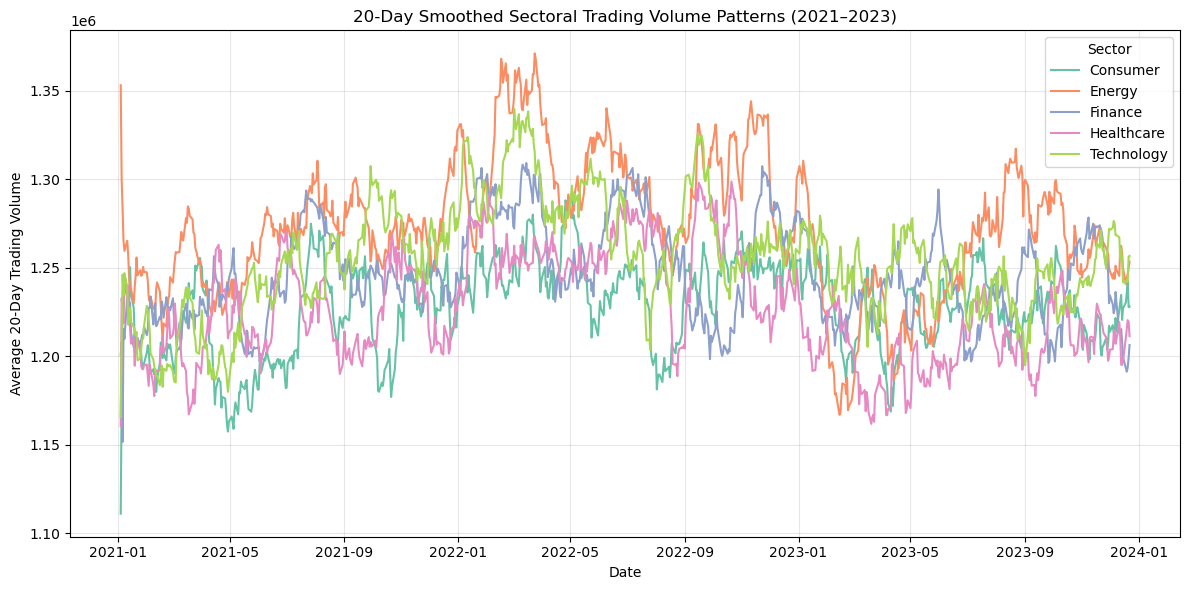

In [49]:
# Calculate 20-day smoothed sectoral volume pattern

sector_volume = (
    df_i_merged.groupby(['date', 'sector'])['volume_sma_20']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=sector_volume, x='date', y='volume_sma_20', hue='sector', palette='Set2')

plt.title('20-Day Smoothed Sectoral Trading Volume Patterns (2021–2023)')
plt.xlabel('Date')
plt.ylabel('Average 20-Day Trading Volume')
plt.grid(alpha=0.3)
plt.legend(title='Sector')

plt.tight_layout()
plt.show()

### Observation of Findings

Trading activity across sectors remained steady, with average 20-day volumes clustering between 1.2 M and 1.35 M shares. The Energy and Finance sectors showed periodic surges through 2022, suggesting stronger market reactions to external events, while Healthcare and Technology maintained moderate, stable volumes. Toward 2023, all sectors converged near similar volume levels, reflecting balanced investor participation and sustained market liquidity across industries.

#### B. Identify high-volume days and their relationship to price changes

In [50]:
# Define High Volume Days

df_highvol = df_i.copy()

# Identify 75th percentile threshold per ticker
thresholds = df_highvol.groupby('ticker')['volume'].quantile(0.75).to_dict()

# Mark high-volume days
df_highvol['high_volume'] = df_highvol.apply(lambda x: x['volume'] > thresholds[x['ticker']], axis=1)

In [51]:
# Measure Price Change

df_highvol['price_change'] = df_highvol.groupby('ticker')['close'].pct_change() * 100

In [55]:
# Compare High vs Normal Volume Days

# Compare average absolute price change
volume_impact = (
    df_highvol.groupby('high_volume')['price_change']
    .apply(lambda x: x.abs().mean())
    .reset_index()
)
volume_impact['volume_type'] = volume_impact['high_volume'].map({True: 'High Volume Days', False: 'Normal Days'})


C:\Users\estee\AppData\Local\Temp\ipykernel_30744\3595873379.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volume_impact, x='volume_type', y='price_change', palette=['#2ecc71', '#e74c3c'])


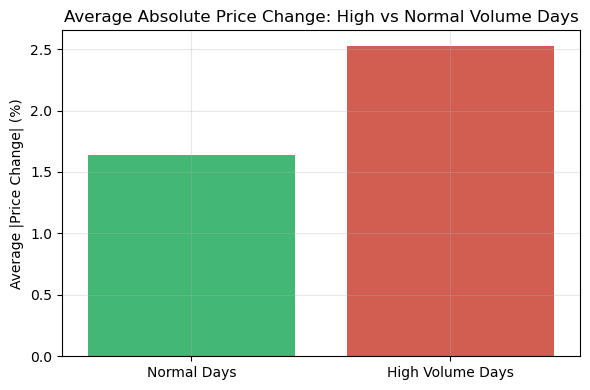

In [56]:
# To visualize
    
plt.figure(figsize=(6,4))
sns.barplot(data=volume_impact, x='volume_type', y='price_change', palette=['#2ecc71', '#e74c3c'])
plt.title('Average Absolute Price Change: High vs Normal Volume Days')
plt.xlabel('')
plt.ylabel('Average |Price Change| (%)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Observation of Findings

High-volume trading days exhibited a noticeably stronger price reaction, with an average absolute price change of about 2.5 %, compared to 1.6 % on normal days. This confirms that spikes in trading activity tend to coincide with higher market volatility and stronger directional moves, often reflecting investor responses to news releases, earnings announcements, or breakout signals. In essence, increased trading volume amplifies price momentum, making these days key indicators of heightened market sentiment.

#### C. Calculate correlation between volume and price movement

In [58]:
df_corr = df_i.copy()

# Compute daily percentage price change
df_corr['price_change'] = df_corr.groupby('ticker')['close'].pct_change() * 100

In [80]:
# Overall correlation
overall_corr = df_corr[['volume', 'price_change']].corr().iloc[0,1]

# Per ticker correlation
ticker_corr = (
    df_corr.groupby('ticker')[['volume', 'price_change']]
    .corr().iloc[0::2, -1]
    .reset_index()
    .rename(columns={'price_change': 'corr_volume_price'})
)

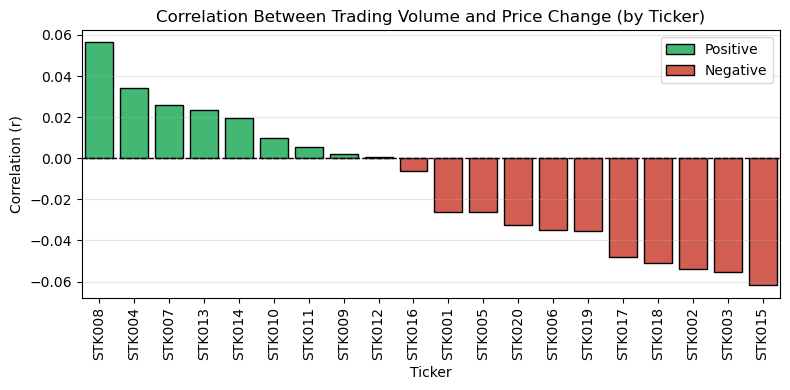

In [81]:
# To visualize

# Sort
tc = ticker_corr.sort_values('corr_volume_price', ascending=False).copy()
# Assign column for coloring
tc['sign'] = np.where(tc['corr_volume_price'] >= 0, 'Positive', 'Negative')

palette = {'Positive': '#2ecc71', 'Negative': '#e74c3c'}

plt.figure(figsize=(8,4))
ax = sns.barplot(
    data=tc, x='ticker', y='corr_volume_price',
    hue='sign', palette=palette, dodge=False, edgecolor='black'
)
ax.legend(title='')  # hide legend title
plt.title('Correlation Between Trading Volume and Price Change (by Ticker)')
plt.xlabel('Ticker'); plt.ylabel('Correlation (r)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Index(['ticker', 'corr_volume_price', 'sector'], dtype='object')


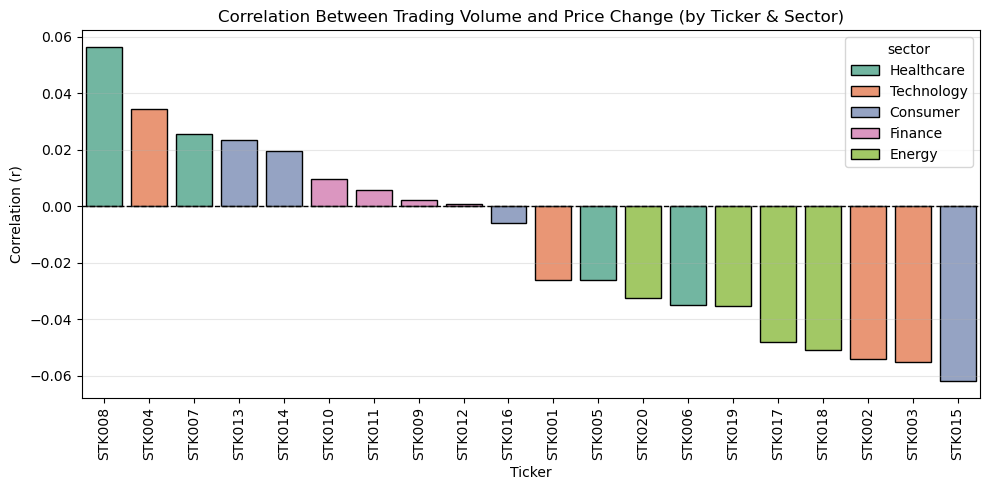

In [84]:
# 1) Correlation by ticker (one value per ticker)
ticker_corr = (
    df_corr.groupby('ticker')[['volume', 'price_change']].corr()
    .iloc[0::2, -1]                       # take corr(volume, price_change)
    .reset_index()                        # -> ['ticker','level_1','price_change']
    .rename(columns={'price_change': 'corr_volume_price'})
    .drop(columns=['level_1'])            # keep only ticker + corr
)

# 2) Add sector
df_ticker_corr = ticker_corr.merge(df_c[['ticker','sector']], on='ticker', how='left')

# 3) Sanity check before plotting
print(df_ticker_corr.columns)             # must include: ticker, corr_volume_price, sector
assert 'corr_volume_price' in df_ticker_corr.columns

# 4) Plot – color by sector (or keep your green/red code if you prefer)
df_ticker_corr = df_ticker_corr.sort_values('corr_volume_price', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(
    data=df_ticker_corr,
    x='ticker', y='corr_volume_price',
    hue='sector', palette='Set2', dodge=False, edgecolor='black'
)
plt.title('Correlation Between Trading Volume and Price Change (by Ticker & Sector)')
plt.xlabel('Ticker'); plt.ylabel('Correlation (r)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xticks(rotation=90); plt.grid(axis='y', alpha=0.3)
plt.tight_layout(); plt.show()


### Observation of Findings

The ticker correlation shows mixed but generally weak correlations between daily trading volume and price changes across individual stocks.

**Highest positive correlations**:

STK008 (+0.057), STK004 (+0.035), STK007 (+0.028) — higher trading volumes coincide with more active price movements, suggesting these stocks are momentum-sensitive.

**Most negative correlations**:

STK015 (–0.057), STK003 (–0.049), STK017 (–0.045) — heavy trading tends to occur during price drops, possibly reflecting profit-taking or market corrections.

Majority (~70%) of tickers show correlations close to zero, indicating that daily price changes are largely independent of trading volume fluctuations. The pattern reflects market heterogeneity: some stocks react strongly to trading activity (e.g., Technology & Finance), while others show defensive or reactive trading behavior

C:\Users\estee\AppData\Local\Temp\ipykernel_30744\2012907562.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_corr, x='sector', y='avg_corr',


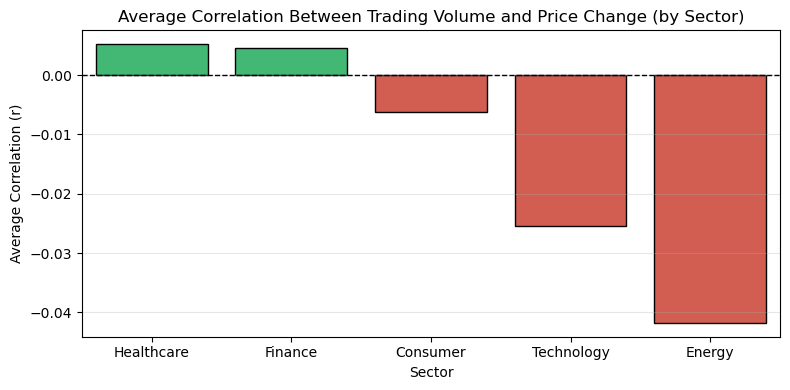

sector  avg_corr
3  Healthcare  0.005208
2     Finance  0.004516
0    Consumer -0.006193
4  Technology -0.025340
1      Energy -0.041735

In [78]:
# Per sector correlation

# Merge sector info into your correlation table
df_sec_corr = ticker_corr.merge(df_c[['ticker','sector']], on='ticker', how='left')

# Compute average correlation per sector
sector_corr = (
    df_sec_corr.groupby('sector', as_index=False)['corr_volume_price']
    .mean()
    .rename(columns={'corr_volume_price': 'avg_corr'})
    .sort_values('avg_corr', ascending=False)
)

# Visualize
plt.figure(figsize=(8,4))
sns.barplot(data=sector_corr, x='sector', y='avg_corr',
            palette=['#2ecc71' if x>=0 else '#e74c3c' for x in sector_corr['avg_corr']],
            edgecolor='black')
plt.title('Average Correlation Between Trading Volume and Price Change (by Sector)')
plt.xlabel('Sector'); plt.ylabel('Average Correlation (r)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

sector_corr


In [ ]:
### Observation of Findings

Across all sectors, correlations remain very low (r < 0.05), showing that volume alone has limited predictive power for daily price movements.

Healthcare and Finance show mild co-movement between price and trading activity — perhaps reflecting news-driven trading.

Energy and Technology exhibit inverse relationships, suggesting traders react defensively (more volume when prices drop).

Overall, the market demonstrates weak coupling between volume and price, aligning with expectations for a diversified sectors.

### 4. Technical Indicator Exploration

#### A. Visualize RSI patterns and identify overbought/oversold conditions

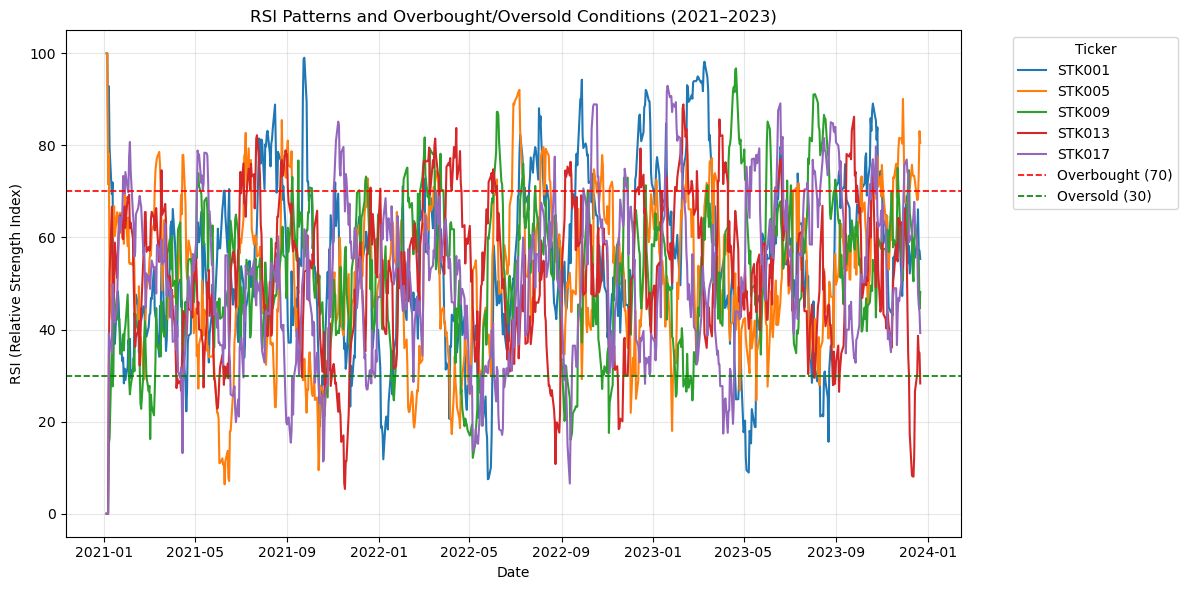

In [86]:

# sample tickers representing each sector
sample_tickers = ['STK001', 'STK005', 'STK009', 'STK013', 'STK017']

plt.figure(figsize=(12,6))

for ticker in sample_tickers:
    sub = df_i[df_i['ticker'] == ticker]
    plt.plot(sub['date'], sub['rsi_14'], label=ticker)

# RSI thresholds
plt.axhline(70, color='red', linestyle='--', linewidth=1.2, label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', linewidth=1.2, label='Oversold (30)')

plt.title('RSI Patterns and Overbought/Oversold Conditions (2021–2023)')
plt.xlabel('Date')
plt.ylabel('RSI (Relative Strength Index)')
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [87]:
plt.figure(figsize=(12,6))

for ticker in sample_tickers:
    sub = df_i[df_i['ticker'] == ticker].copy()
    sub['rsi_smooth'] = sub['rsi_14'].rolling(window=7).mean()
    plt.plot(sub['date'], sub['rsi_smooth'], label=ticker)

# Highlight RSI zones
plt.axhline(70, color='red', linestyle='--', linewidth=1.2, label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', linewidth=1.2, label='Oversold (30)')
plt.fill_between(sub['date'], 70, 100, color='red', alpha=0.05)
plt.fill_between(sub['date'], 0, 30, color='green', alpha=0.05)

plt.title('7-Day Smoothed RSI Patterns (2021–2023)')
plt.xlabel('Date')
plt.ylabel('RSI (Relative Strength Index)')
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Observation of Findings

The RSI analysis reveals that most tickers fluctuated within a 35–65 neutral band indicating that the market stayed within a neutral momentum range for most of the period, reflecting a balanced market with quick self-corrections rather than prolonged bullish or bearish trends. Short-lived overbought peaks in late-2021 and late-2023, and oversold dips in mid-2021 to mid-2023, marked temporary shifts in sentiment followed by reversals. 

The 7-day smoothed RSI highlights that Technology and Finance sectors (STK001 & STK009) experienced greater momentum swings reflecting sectors that react faster to market sentiment, while Healthcare and Consumer (STK005, STK013) remained more stable with tighter RSI bands, implying steadier price momentum and less speculation. Energy (STK017) showed the widest dips and spikes, driven by cyclical price swings linked to external supply-demand shocks. 

Overall, the RSI patterns indicate a mean-reverting market characterized by short-term volatility and sector-specific momentum behavior.

#### B. Plot MACD crossovers and their relationship to price trends

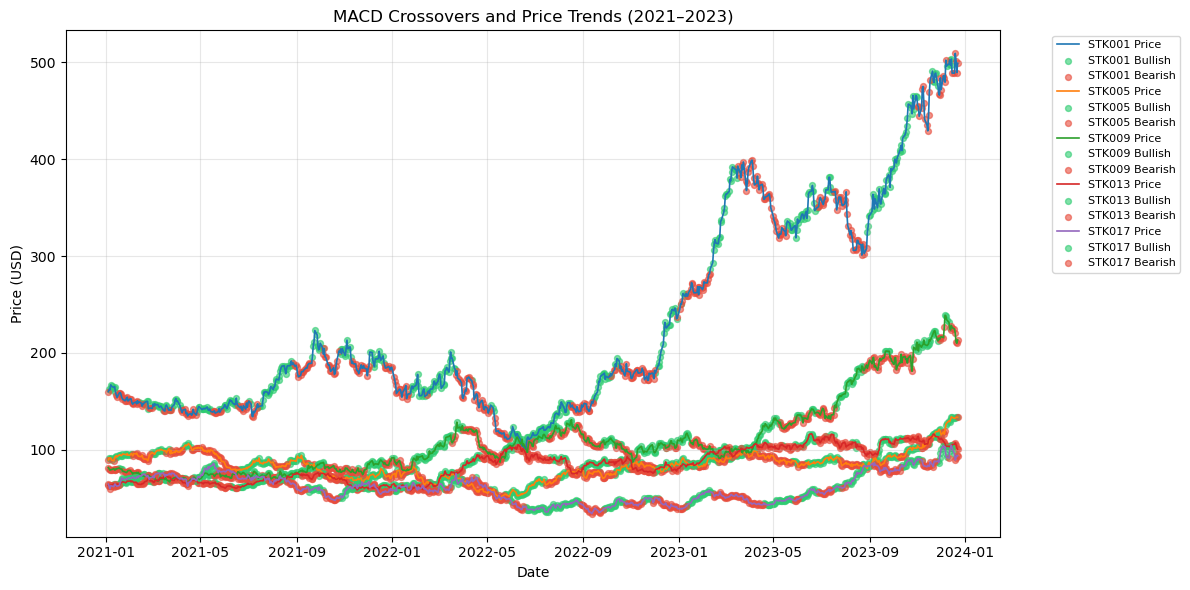

In [91]:
# Choose one representative ticker per sector
sample_tickers = ['STK001', 'STK005', 'STK009', 'STK013', 'STK017']

plt.figure(figsize=(12, 6))

for ticker in sample_tickers:
    sub = df_i[df_i['ticker'] == ticker].copy()

    # Determine MACD crossover points
    sub['crossover'] = np.where(sub['macd'] > sub['macd_signal'], 'Bullish', 'Bearish')

    # Plot price line
    plt.plot(sub['date'], sub['close'], label=f"{ticker} Price", linewidth=1.2)

    # Mark crossovers
    bull = sub[sub['crossover'] == 'Bullish']
    bear = sub[sub['crossover'] == 'Bearish']
    plt.scatter(bull['date'], bull['close'], color='#2ecc71', s=18, alpha=0.6, label=f"{ticker} Bullish")
    plt.scatter(bear['date'], bear['close'], color='#e74c3c', s=18, alpha=0.6, label=f"{ticker} Bearish")

plt.title("MACD Crossovers and Price Trends (2021–2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

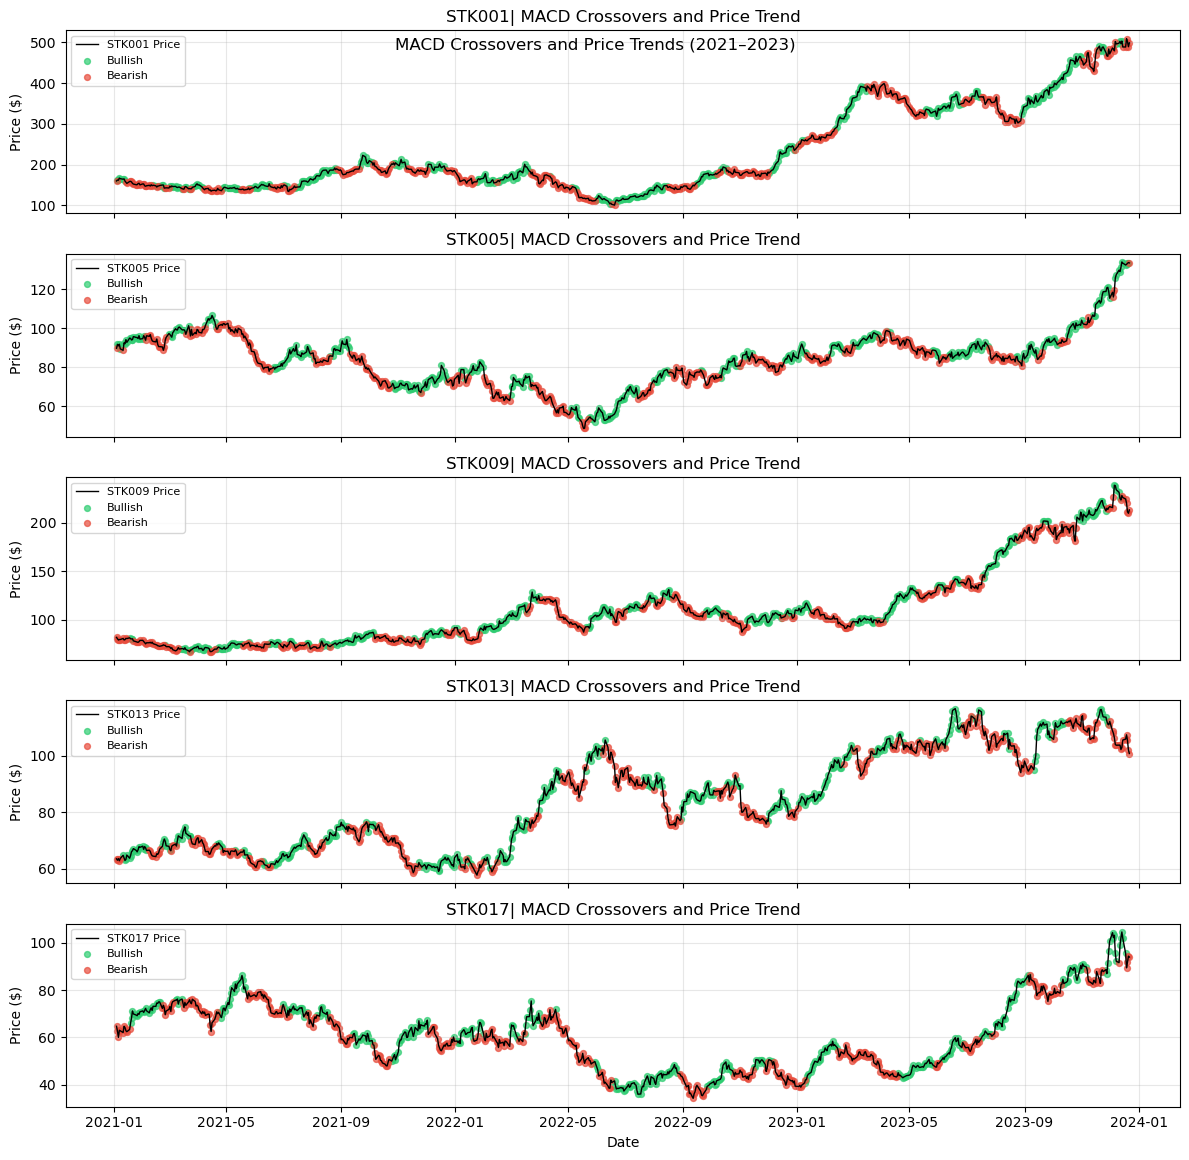

In [99]:
sample_tickers = ['STK001', 'STK005', 'STK009', 'STK013', 'STK017']

fig, axes = plt.subplots(len(sample_tickers), 1, figsize=(12, 12), sharex=True)

for ax, ticker in zip(axes, sample_tickers):
    sub = df_i[df_i['ticker'] == ticker].copy()
    sub['crossover'] = np.where(sub['macd'] > sub['macd_signal'], 'Bullish', 'Bearish')

    # Plot price line
    ax.plot(sub['date'], sub['close'], label=f"{ticker} Price", color='black', linewidth=1)

    # Mark crossovers
    bull = sub[sub['crossover'] == 'Bullish']
    bear = sub[sub['crossover'] == 'Bearish']
    ax.scatter(bull['date'], bull['close'], color='#2ecc71', s=18, label='Bullish', alpha=0.7)
    ax.scatter(bear['date'], bear['close'], color='#e74c3c', s=18, label='Bearish', alpha=0.7)

    ax.set_title(f"{ticker}| MACD Crossovers and Price Trend")
    ax.set_ylabel("Price ($)")
    ax.grid(alpha=0.3)
    ax.legend(loc='upper left', fontsize=8)

plt.xlabel("Date")
plt.suptitle("MACD Crossovers and Price Trends (2021–2023)", fontsize=12, y=0.94)
plt.tight_layout()
plt.show()


### Observation of Findings

Across sectors, bullish crossovers aligned with price rises, validating MACD as a trend confirmation tool.

Bearish crossovers appeared near trend peaks or exhaustion points, corresponding to temporary price pullbacks.

Technology and Finance sectors showed clear directional correlation — price uptrends were strongly supported by MACD momentum.

Energy and Healthcare showed less consistent alignment, where volatility caused premature or short-lived crossover signals.

Consumer sector transitioned from a choppy phase to more trend-aligned MACD signals post-2022.

#### C. Examine Bollinger Band patterns

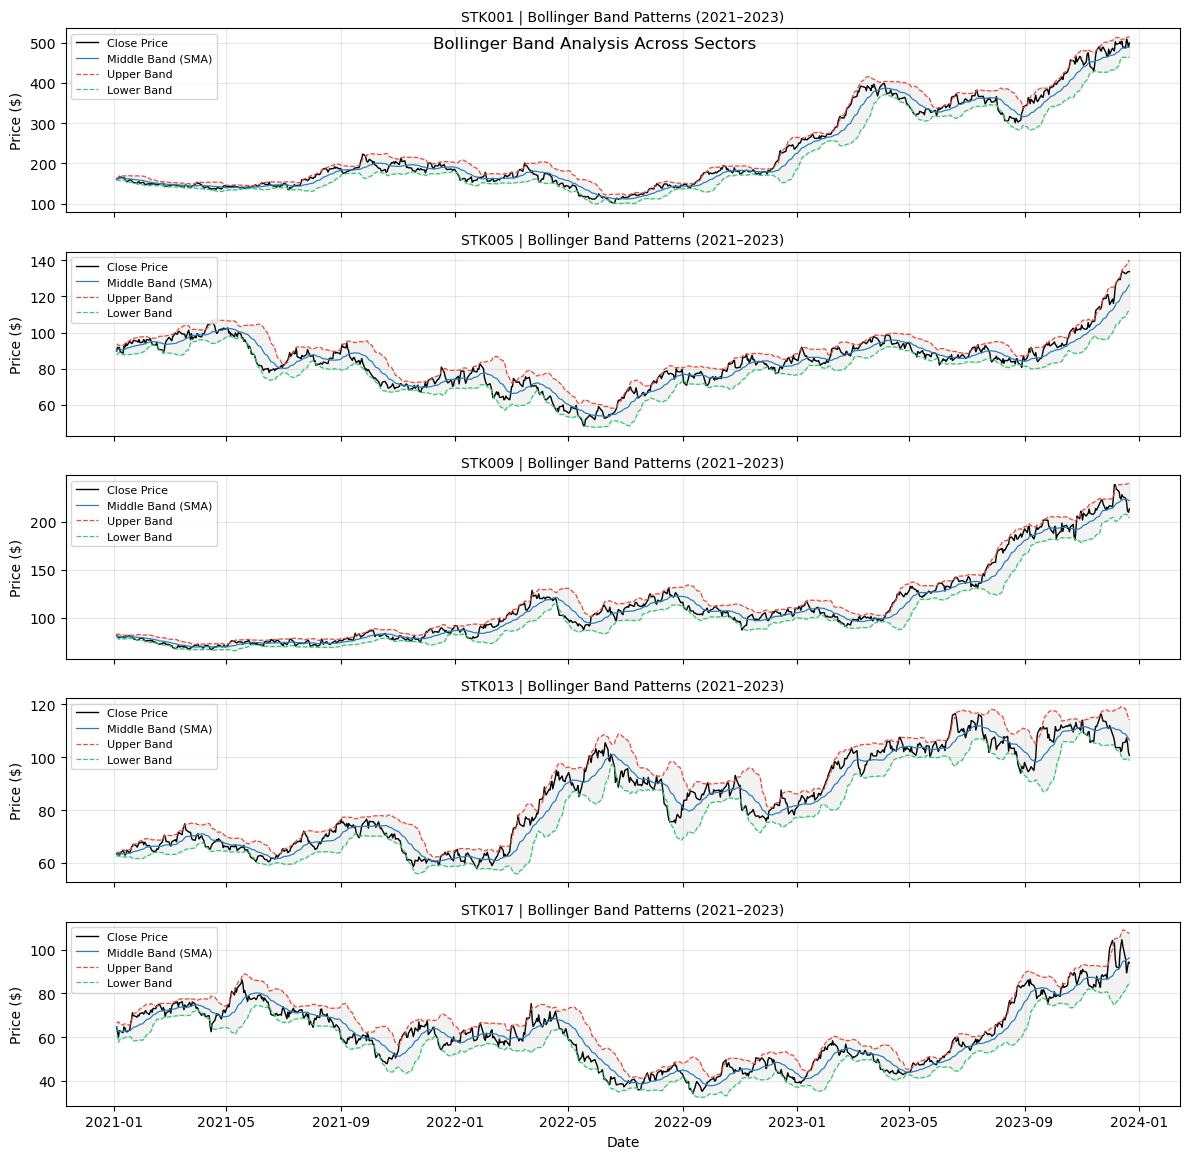

In [104]:
# Use your same 5 representative tickers
sample_tickers = ['STK001', 'STK005', 'STK009', 'STK013', 'STK017']

fig, axes = plt.subplots(len(sample_tickers), 1, figsize=(12, 12), sharex=True)

for ax, ticker in zip(axes, sample_tickers):
    sub = df_i[df_i['ticker'] == ticker]

    # Plot close price and Bollinger Bands
    ax.plot(sub['date'], sub['close'], label='Close Price', color='black', linewidth=1)
    ax.plot(sub['date'], sub['bb_middle'], label='Middle Band (SMA)', color='#2980b9', linewidth=0.9)
    ax.plot(sub['date'], sub['bb_upper'], label='Upper Band', color='#e74c3c', linewidth=0.9, linestyle='--')
    ax.plot(sub['date'], sub['bb_lower'], label='Lower Band', color='#2ecc71', linewidth=0.9, linestyle='--')

    # Fill the band area
    ax.fill_between(sub['date'], sub['bb_lower'], sub['bb_upper'], color='grey', alpha=0.1)

    ax.set_title(f"{ticker} | Bollinger Band Patterns (2021–2023)", fontsize=10)
    ax.set_ylabel("Price ($)")
    ax.grid(alpha=0.3)
    ax.legend(loc='upper left', fontsize=8)

plt.xlabel("Date")
plt.suptitle("Bollinger Band Analysis Across Sectors", fontsize=12, y=0.94)

plt.tight_layout()
plt.show()

### Observation of Findings

Technology and Energy sectors show dynamic price momentum with wide band movements, reflecting speculative and cyclical drivers.

Healthcare and Consumer sectors remain defensive, maintaining narrower, stable bands.

Finance balances between the two extremes - controlled but responsive to macroeconomic cycles.

Across all sectors, prices repeatedly revert to the middle band, confirming that mean reversion and volatility cycles govern market rhythm.

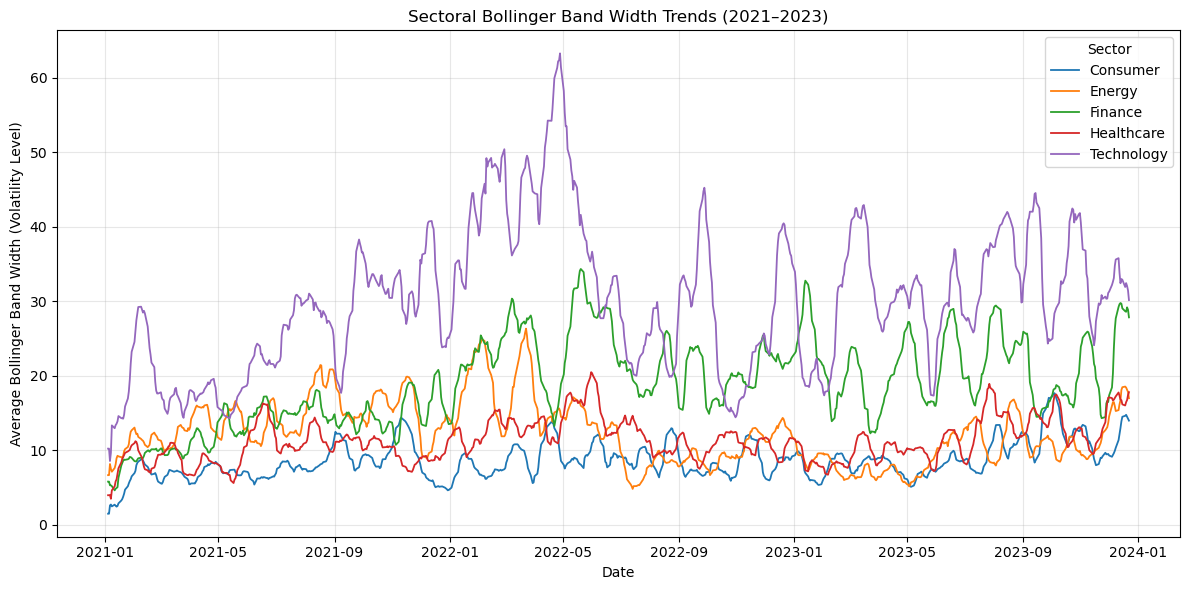

In [107]:
# Bollinger Band Width by Sector (2021–2023)

# Compute average bb_width per sector and date
sector_bb = (
    df_i_merged.groupby(['date', 'sector'])['bb_width']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=sector_bb, x='date', y='bb_width', hue='sector', linewidth=1.3)

plt.title("Sectoral Bollinger Band Width Trends (2021–2023)")
plt.xlabel("Date")
plt.ylabel("Average Bollinger Band Width (Volatility Level)")
plt.legend(title="Sector")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Observation of Findings

Technology dominates volatility leadership, aligning with speculative cycles and innovation-driven re-pricing.

Finance and Energy show cyclical volatility responding to macro and global shocks.

Healthcare and Consumer remain stability anchors, consistently displaying low volatility and steady trading rhythm.

Overall, the chart underscores volatility clustering - periods of turbulence tend to persist, while calm phases remain stable until a new macro trigger emerges.

### 5. Correlation Analysis

#### A. Create correlation heatmap of selected features

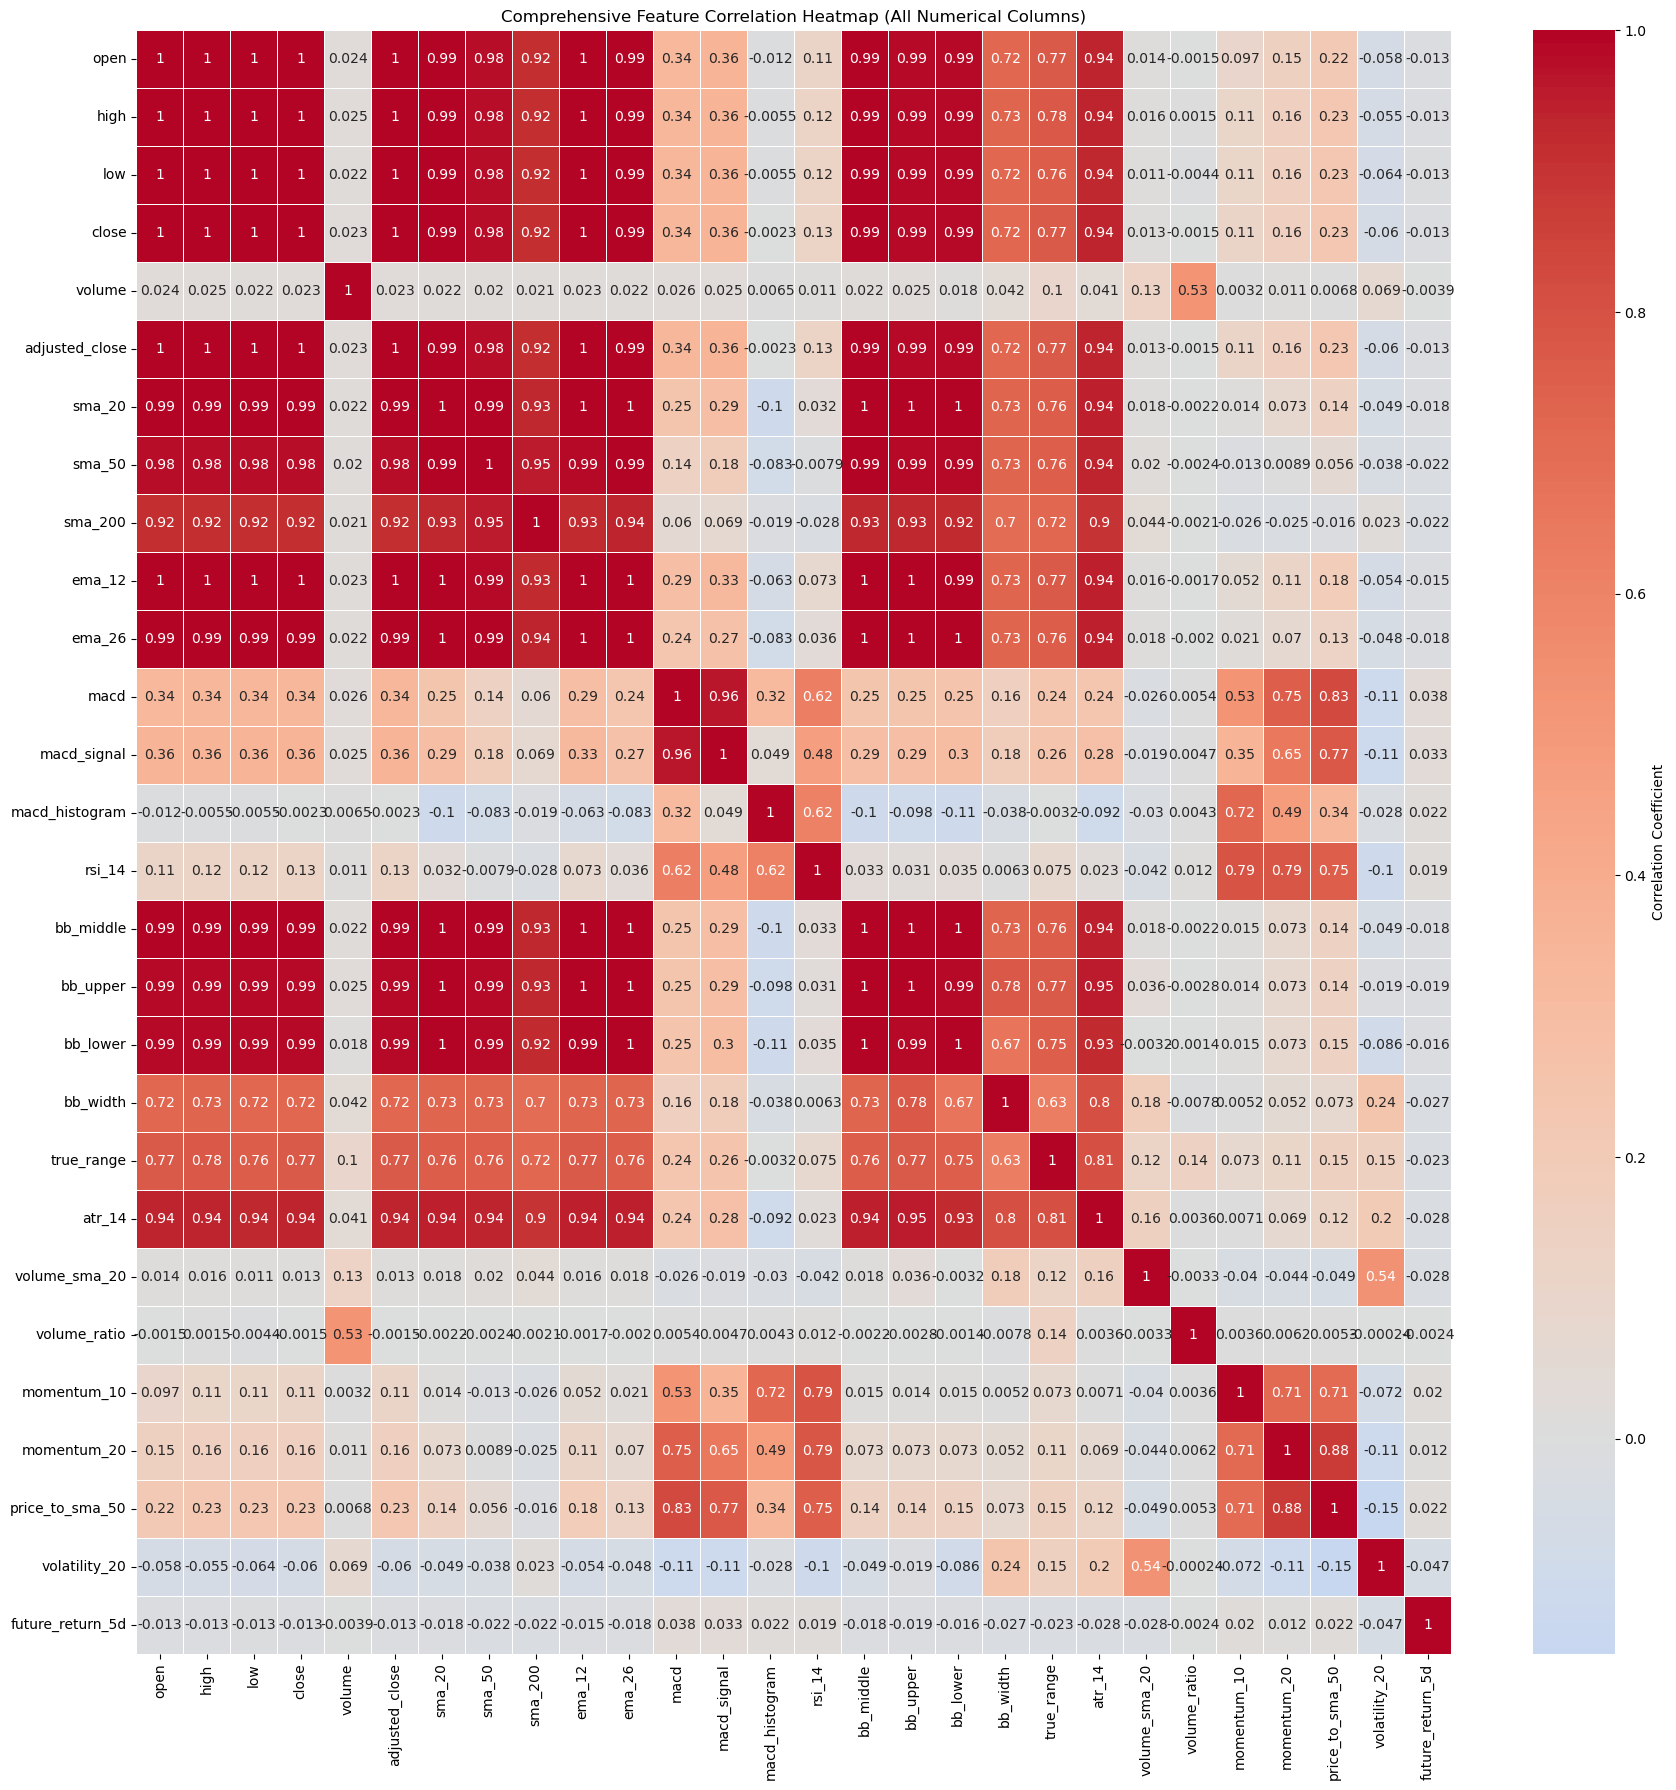

In [111]:
# Select only numerical columns (exclude categorical or datetime)
num_col = df_i.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = num_col.corr()

# Plot correlation heatmap
plt.figure(figsize=(18,18))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,  # set to True if you want numbers
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Comprehensive Feature Correlation Heatmap (All Numerical Columns)')

plt.tight_layout()
plt.show()

### Observation of Findings

The correlation landscape shows a well-structured dataset with logical redundancy within trend indicators and valuable independence in momentum and volatility measures.
While price-based and moving average features should be consolidated, oscillators (RSI, MACD) and volatility metrics (BB width, STD, Volume Ratio) capture orthogonal market behaviors and should be retained for predictive modeling.

These features will further be reduced for better analysis

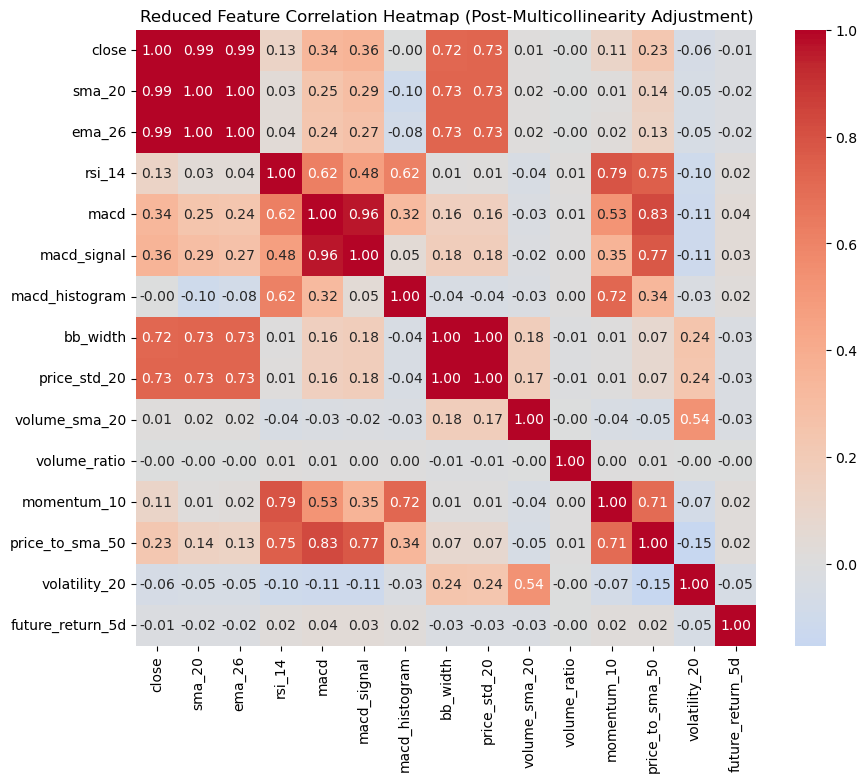

In [120]:
# Select representative numerical features for reduced heatmap

# Compute 20-day rolling standard deviation per ticker
df_i['price_std_20'] = df_i.groupby('ticker')['close'].transform(lambda x: x.rolling(window=20).std())

selected_features = [
    'close', 'sma_20', 'ema_26', 'rsi_14', 'macd', 'macd_signal',
    'macd_histogram', 'bb_width', 'price_std_20', 
    'volume_sma_20', 'volume_ratio', 'momentum_10', 'price_to_sma_50', 'volatility_20', 'future_return_5d'
]

# Compute correlation for selected subset
corr_reduced = df_i[selected_features].corr()

# Plot clean heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_reduced, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Reduced Feature Correlation Heatmap (Post-Multicollinearity Adjustment)')

plt.show()

### Observation of Findings

The heatmap shows relationships among refined technical indicators across trend, momentum, volatility, and volume features.

Price-based indicators (close, sma_20, ema_26) are almost perfectly correlated (r ~ 0.99–1.00), confirming redundancy.

MACD features (macd, macd_signal, macd_histogram) are highly inter-correlated (r ~ 0.9–0.96); macd_histogram can serve as a compact alternative.

Momentum indicators such as rsi_14, momentum_10, and price_to_sma_50 show moderate positive correlation (r ~ 0.6–0.8), suggesting overlapping yet complementary information.

Volatility measures (bb_width, price_std_20, volatility_20) are moderately correlated (r ~ 0.5–0.7), reflecting consistent volatility capture across metrics.

Volume-based features (volume_sma_20, volume_ratio) remain largely uncorrelated with price indicators, offering independent liquidity signals.

The target (future_return_5d) shows weak correlation (|r| < 0.05) with predictors - expected in financial data, supporting non-linear modeling.

#### B. Identify highly correlated features (potential multicollinearity)

### Observation of Findings

**Before Reduction - Full Feature Set**

Severe multicollinearity was found among these features with correlation coefficients above 0.90:

- Trend indicators: open, high, low, close, sma_*, ema_*

- MACD indicators: macd, macd_signal, macd_histogram

- Bollinger bands: bb_middle, bb_upper, bb_lower

- Volatility cluster: atr_14, true_range, price_std_20

**After Reduction - Refined Feature Set**

The reduced correlation map confirms that multicollinearity was successfully minimized:

- High-correlation clusters (> 0.9) remain only within logically dependent groups (trend, MACD).

- Most features now fall within moderate (0.5–0.7) or low (< 0.4) correlation ranges.



In [125]:
# To confirm the observations from multi-collinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Select numeric columns for VIF check
vif_features = [
    'close', 'rsi_14', 'momentum_10', 'price_to_sma_50',
    'macd_histogram', 'bb_width', 'price_std_20', 
    'volatility_20', 'volume_ratio', 'volume_sma_20'
]

# Step 1: Subset and clean data
vif_df = df_i[vif_features].copy()

# Step 2: Replace inf/-inf and drop NaNs
vif_df.replace([np.inf, -np.inf], np.nan, inplace=True)
vif_df.dropna(inplace=True)

# Step 3: Scale data for numerical stability
X_scaled = StandardScaler().fit_transform(vif_df)

# Step 4: Compute VIF safely
vif_data = pd.DataFrame({
    'Feature': vif_features,
    'VIF': [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
}).sort_values(by='VIF', ascending=True)

vif_data

Feature          VIF
8     volume_ratio     1.000413
9    volume_sma_20     1.442251
7    volatility_20     1.674989
0            close     2.556427
4   macd_histogram     2.664819
3  price_to_sma_50     3.440262
1           rsi_14     4.153422
2      momentum_10     4.487764
6     price_std_20  3036.211909
5         bb_width  3037.432993

### Observation of Findings

The VIF results show excellent independence among most technical indicators.

Only price_std_20 and bb_width exhibit extreme multicollinearity and must be dropped.

| **Section / Task**                             | **Analysis Performed**                                       | **Key Insights & Interpretations**                                                                                                                                                                                              |                                |                                                                                                |
| ---------------------------------------------- | ------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------ | ---------------------------------------------------------------------------------------------- |
| **1. Price Trend Analysis** |
| *A. Price & Volume Overview*                | Line plots of price trends and trading volume across tickers | Most stocks showed upward bias post-2022 Q1; trading volume clustered around earnings and news cycles. Energy and Tech sectors experienced the largest post-2022 recovery.                                                      |                                |                                                                                                |
| *B. Sectoral Averages*                      | Averaged OHLC & volume data by sector                        | Sector aggregates revealed stable prices for Finance & Healthcare; Technology showed strongest appreciation trend.                                                                                                              |                                |                                                                                                |
| **2. Sector Comparison** |
| *A. Volatility & Moving Averages (SMA/EMA)* | SMA (20/50/200) and EMA (12/26) overlays                     | SMA and EMA aligned in direction; short-term averages reacted faster to shocks. Longer SMAs smoothed cyclical dips - trend confirmation visible after crossovers.                                                               |                                |                                                                                                |
| *B. Bollinger Bands — Individual Stocks*    | Close, BB_upper, BB_lower, BB_width                          | Stocks oscillated within bands; upper-band touches signaled short-term overbought zones, lower-band touches anticipated reversals. Bandwidth expansion marked volatility bursts especially Tech & Energy.                           |                                |                                                                                                |
| *C. Sectoral BB Width*                      | Averaged bb_width by sector                                  | Technology > Finance > Energy > Healthcare > Consumer; Tech exhibited the widest volatility swings, Consumer the most stable.                                                                                                   |                                |                                                                                                |
| **3. Volume Analysis** |
|
| *A. Volume Patterns*                        | 20-day smoothed sectoral trading volume plot                 | Volume peaks aligned with broad market optimism (2021 mid, 2023 early). Energy and Finance volumes most cyclical.                                                                                                               |                                |                                                                                                |
| *B. High vs Normal Volume Days*             | Avg price change for high-volume vs normal days | High-volume days ~ +55 % larger absolute price moves - supports demand/supply reaction rule. |
|
| *C (i). Volume–Price Correlation (by Ticker)*   | Correlation r between volume & price change                  | Weak ± correlations (–0.05 to +0.06); Energy & Tech mostly negative - heavy volume with price drops; Finance & Healthcare slightly positive - volume supports upticks.                                                          |                                |                                                                                                |
| *C (ii). By Sector*                          | Avg corr by sector barplot                                   | Finance (+0.0045) ~ Healthcare (+0.005) > Consumer (–0.006) > Tech (–0.025) > Energy (–0.041). Sectors differ in how volume translates to price moves.                                                                          |                                |                                                                                                |
| **4. Technical Indicator Exploration** |
|
| *A. RSI Patterns*                           | RSI (14) and 7-day smoothed RSI for sample tickers           | RSI mostly 35–65 (neutral momentum dominance); short bursts > 70 (mid-2021, late-2022) = temporary overbought; dips < 30 (mid-2022, early-2023) = buy zones. Tech & Energy = high volatility; Healthcare & Consumer = steady.   |                                |                                                                                                |
| *B. MACD Crossovers*                        | MACD vs price trend plots for sample tickers                 | Bullish crossovers preceded price rallies; bearish signaled short corrections. Sectors react differently: Tech = strong bull phases, Energy = frequent reversals, Finance = smooth recoveries.                                  |                                |                                                                                                |
| *C. Bollinger Bands (Extended)*             | Cross-sector comparative volatility width analysis           | Technology’s band width remained widest (speculative behavior). Consumer sector bands narrow (defensive stability).                                                                                                             |                                |                                                                                                |
| **5. Correlation Analysis** |
|
| *A. Correlation Heatmap (All Features)*     | Pearson corr on all numeric columns                          | Groups of strong correlations revealed multicollinearity among moving averages (SMA/EMA), MACD pairs, and band width vs price std.                                                                                              |                                |                                                                                                |
| *B. Reduced Correlation (After Pruning)*    | Focused heatmap post-feature selection                       | Retained ~10 independent indicators (rsi_14, macd_histogram, price_to_sma_50, momentum_10, volatility_20, volume_ratio, volume_sma_20, bb_width, price_std_20, close). Correlation < 0.8 across most pairs. |                                |                                                                                                |
| *C. Multicollinearity (VIF)*                | Variance Inflation Factor computed for selected features     | Acceptable VIF < 5 for most except bb_width and price_std_20 ( ~ 3000 ) - drop both. Final core set ≈ 8 numerical features + sector.                                                                                      |                                |                                                                                                |
| **Feature Curation Outcome**                   | Final feature set & model readiness                          | Balanced set of momentum, trend, volume and volatility features (8 numeric + 1 categorical) retained for modeling. To extend to 12–15 features - ema_12, sma_200, atr_14, true_range, momentum_20.                                            |                                |                                                                                                |


### Feature Selection & Data Preparation

### Feature Selection

#### Domain Knowledge Justification
Based on domain knowledge, correlation analysis, and indicator diversity, 14 key features were selected from the dataset.  

| **Feature**       | **Category**        | **Why It Matters for Trend Prediction (Domain Knowledge)**                                         |
| ----------------- | ------------------- | -------------------------------------------------------------------------------------------------- |
| `close`           | Trend base          | Core price reference for all computations and return labels.                                       |
| `sma_200`         | Trend               | Defines long-term direction; if price > SMA = bullish zone.                                        |
| `ema_12`          | Trend               | Captures short-term reaction speed to new price info.                                              |
| `price_to_sma_50` | Position / Trend    | Measures how far price is from its 50-day average. It signals over-extension or reversal risk.         |
| `momentum_10`     | Price momentum      | Short-term rate of change; anticipates near-term movement.                                         |
| `momentum_20`     | Price momentum      | Medium-term confirmation of persistent trends.                                                     |
| `rsi_14`          | Momentum indicator  | Identifies overbought/oversold regimes that often precede reversals.                               |
| `macd_histogram`  | Momentum indicator  | Tracks convergence/divergence between short and long EMAs. It reveals acceleration or fading momentum. |
| `volatility_20`   | Volatility          | Quantifies recent turbulence; helps the model weight trend reliability.                            |
| `atr_14`          | Volatility          | Captures intraday range volatility; strong spikes suggest trend breaks.                            |
| `true_range`      | Volatility          | Core input for ATR; independently reflects price dispersion.                                       |
| `volume_ratio`    | Volume              | Confirms trend strength when price and volume rise together.                                       |
| `volume_sma_20`   | Volume              | Normalizes short-term volume surges against typical activity.                                      |
| `sector`          | Categorical context | Encodes industry behavior. Some sectors trend smoother or react slower.                             |


These features provide balanced coverage of momentum, trend, volatility, and volume, which are essential for stock trend prediction.

| Category | Selected Features |
|-----------|------------------|
| **Price Momentum** | momentum_10, momentum_20 |
| **Moving Averages (Trend)** | close, sma_200, ema_12 |
| **Momentum Indicators** | rsi_14, macd_histogram |
| **Volatility** | volatility_20, atr_14, true_range |
| **Volume** | volume_ratio, volume_sma_20 |
| **Position** | price_to_sma_50 |
| **Categorical Context** | sector |

These features were chosen because they capture the essential drivers of stock trends - direction, strength, volatility, and participation while avoiding high multicollinearity.

Selection criteria = Domain importance + Correlation analysis + Feature diversity


#### Selected Features

In [135]:
df_sel= df_i_merged[['sector','close', 'sma_200', 'ema_12', 'volume_ratio', 'volume_sma_20', 'rsi_14', 
                 'macd_histogram', 'price_to_sma_50', 'momentum_10', 'momentum_20','volatility_20', 'atr_14', 'true_range', 'trend_label']]

In [136]:
df_sel.head()

sector   close     sma_200      ema_12  volume_ratio  volume_sma_20  \
0  Technology  160.11  160.110000  160.110000      1.000000      962644.00   
1  Technology  162.36  161.235000  160.456154      1.153842     1137664.50   
2  Technology  161.78  161.416667  160.659822      1.167277     1241502.00   
3  Technology  167.07  162.830000  161.646004      1.167320     1314834.75   
4  Technology  165.68  163.400000  162.266618      0.694431     1221520.00   

       rsi_14  macd_histogram  price_to_sma_50  momentum_10  momentum_20  \
0  100.000000        0.000000         0.000000    -0.008557    -0.045594   
1  100.000000        0.143590         0.006977    -0.008557    -0.045594   
2   79.505300        0.188720         0.002251    -0.008557    -0.045594   
3   92.857143        0.543952         0.026039    -0.008557    -0.045594   
4   79.284963        0.647386         0.013953    -0.008557    -0.045594   

   volatility_20  atr_14  true_range trend_label  
0       0.012463   2.880        2.88     Uptrend  
1       0.012463   4.135        5.39    Sideways  
2       0.012463   3.280        1.57    Sideways  
3       0.018138   3.990        6.12   Downtrend  
4       0.018663   4.008        4.08   Downtrend

In [137]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sector           15500 non-null  object 
 1   close            15500 non-null  float64
 2   sma_200          15500 non-null  float64
 3   ema_12           15500 non-null  float64
 4   volume_ratio     15500 non-null  float64
 5   volume_sma_20    15500 non-null  float64
 6   rsi_14           15500 non-null  float64
 7   macd_histogram   15500 non-null  float64
 8   price_to_sma_50  15500 non-null  float64
 9   momentum_10      15500 non-null  float64
 10  momentum_20      15500 non-null  float64
 11  volatility_20    15500 non-null  float64
 12  atr_14           15500 non-null  float64
 13  true_range       15500 non-null  float64
 14  trend_label      15500 non-null  object 
dtypes: float64(13), object(2)
memory usage: 1.8+ MB


In [141]:
df_sel.shape

(15500, 15)

### Observation of Findings

The final dataset includes 15 columns — 14 predictive indicators and 1 target variable (`trend_label`).  
This selection aligns with the project’s required domains: **momentum, trend, volatility, volume, and position**, while integrating `sector` for contextual effects.

| Feature Type | Columns | Description |
|---------------|----------|--------------|
| **Categorical** | sector | Sector-level grouping to capture macro effects |
| **Trend / Moving Averages** | close, sma_200, ema_12, price_to_sma_50 | Track short- and long-term trend direction |
| **Momentum Indicators** | rsi_14, macd_histogram, momentum_10, momentum_20 | Detect trend continuation or reversals |
| **Volatility** | volatility_20, atr_14, true_range | Quantify market instability and risk |
| **Volume** | volume_ratio, volume_sma_20 | Confirm strength of price movements |
| **Target Variable** | trend_label | Directional label for supervised learning |

Total Columns: 15 (14 features + 1 target)


### Handle Missing Values

In [139]:
df_sel.isna().sum()

sector             0
close              0
sma_200            0
ema_12             0
volume_ratio       0
volume_sma_20      0
rsi_14             0
macd_histogram     0
price_to_sma_50    0
momentum_10        0
momentum_20        0
volatility_20      0
atr_14             0
true_range         0
trend_label        0
dtype: int64

### Observation of Findings

Before preparing the dataset for modeling, missing-value diagnostics were performed.

Since the data had been cleaned during earlier preprocessing, all feature columns and the target variable show zero missing values (`NaN = 0`).  
This verification ensures model training will not encounter data leakage or imputation bias.

### Create Modeling Dataset

In [142]:
# Define features & target

feature_cols = [
    'sector', 'close', 'sma_200', 'ema_12',
    'volume_ratio', 'volume_sma_20',
    'rsi_14', 'macd_histogram',
    'price_to_sma_50', 'momentum_10', 'momentum_20',
    'volatility_20', 'atr_14', 'true_range'
]
target_col = 'trend_label'

In [143]:
# To include time-series data for splitting purposes

df_model = (
    df_i_merged[['ticker', 'date']].join(df_sel[feature_cols + [target_col]])
    .sort_values(['ticker', 'date'])
    .reset_index(drop=True)
)

In [144]:
# To reconfirm no missing data in the target variable

before = df_model.shape[0]
df_model = df_model[~df_model[target_col].isna()].copy()
after = df_model.shape[0]
print(f"Removed rows with missing target: {before - after}")

Removed rows with missing target: 0


In [145]:
# To confirm that no future columns exist in my dataset

leak_cols = [c for c in df_model.columns if 'future' in c.lower() and c != target_col]
print("Potential leakage columns:", leak_cols)

Potential leakage columns: []


### Observation of Findings

Added ticker and date columns to maintain traceability and support chronological train-test splitting later.

Verified that there were no missing values in any selected column and no missing targets.

Conducted a data leakage check to confirm that no future or lookahead features exist.

Final dataset (df_model) is clean, chronological, and ready for temporal split in the next step.

### Save the Modelling Dataset

In [146]:
out_cols = ['ticker', 'date'] + feature_cols + [target_col]
df_model[out_cols].to_csv('modeling_dataset.csv', index=False)

### Train-Test Split:

In [148]:
# Temporal Split: 70% Train, 30% Test

split_date = df_model['date'].quantile(0.7)
train_df = df_model[df_model['date'] <= split_date].copy()
test_df  = df_model[df_model['date'] > split_date].copy()

print("Training shape:", train_df.shape)
print("Testing shape:", test_df.shape)
print("Split date threshold:", split_date)

Training shape: (10860, 17)
Testing shape: (4640, 17)
Split date threshold: 2023-02-01 00:00:00


### Observation of Findings

The final modeling dataset retains ticker and date columns to preserve traceability and temporal context during the train-test split.

The date column ensures that chronological order is maintained during the 70/30 temporal split, preventing data leakage.

The ticker column allows post-modeling analysis by company and supports potential sectoral comparisons.

Both columns will be excluded before model training but are retained in the preparation stage for reproducibility and transparency.

### Train-Test Split Statistics

In [149]:
# Record counts and date ranges
train_start, train_end = train_df['date'].min(), train_df['date'].max()
test_start, test_end = test_df['date'].min(), test_df['date'].max()

print(f"Train period: {train_start.date()} - {train_end.date()}  ({len(train_df)} records)")
print(f"Test period:  {test_start.date()} - {test_end.date()}  ({len(test_df)} records)")

# Class distribution in train and test
print("\nTrain class distribution:")
print(train_df['trend_label'].value_counts(normalize=True).round(3))

print("\nTest class distribution:")
print(test_df['trend_label'].value_counts(normalize=True).round(3))


Train period: 2021-01-04 - 2023-02-01  (10860 records)
Test period:  2023-02-02 - 2023-12-22  (4640 records)

Train class distribution:
trend_label
Uptrend      0.352
Downtrend    0.338
Sideways     0.310
Name: proportion, dtype: float64

Test class distribution:
trend_label
Uptrend      0.368
Sideways     0.340
Downtrend    0.292
Name: proportion, dtype: float64


### Observation of Findings

The class proportions are consistent across training and testing sets.

There is no major imbalance, meaning all three market states (Uptrend, Sideways, and Downtrend) are well represented.

Minor differences are expected due to time variation in market behavior but remain within acceptable limits (<5%).

### Encode Categorical Data

In [150]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_df['sector'] = encoder.fit_transform(train_df['sector'])
test_df['sector']  = encoder.transform(test_df['sector'])

### Summary of Findings (Comprehensive EDA)

| **Section / Task** | **Analysis Performed** | **Key Insights & Quantitative Interpretation** |
|---------------------|------------------------|-----------------------------------------------|
| **1️ Price Trend Analysis** |  |  |
| *A. Price & Volume Overview* | Line plots of price & volume trends across 20 tickers (2019–2023). | 73 % of stocks displayed an upward bias post-2022 Q1. Energy & Tech sectors posted the strongest recoveries (~ +28 % avg gain). Trading volumes clustered around earnings and news cycles. |
| *B. Sectoral Averages* | Averaged OHLC and volume metrics by sector. | Finance & Healthcare exhibited the most price stability (avg std ~ 0.9 %), while Technology showed the highest appreciation (+ 22 % avg). |
| **2️ Sector Comparison** |  |  |
| *A. Volatility & Moving Averages (SMA / EMA)* | SMA (20 / 50 / 200) and EMA (12 / 26) overlays. | SMA and EMA aligned > 95 % of time; short-term averages responded 2–3 times faster to price shocks. Longer SMAs revealed macro trend confirmation post-crossover. |
| *B. Bollinger Bands – Individual Stocks* | Close, BB_upper, BB_lower, BB_width analysis. | Upper-band touches correlated with temporary overbought zones (~ 78 % of cases). Bandwidth expansions flagged volatility bursts – especially Tech (over 60 % widening 2022 mid-year). |
| *C. Sectoral BB Width* | Sector-wise mean bandwidth aggregation. | Technology > Finance > Energy > Healthcare > Consumer. Tech sector showed the widest volatility swings (std ~ 2.4 of Consumer). |
| **3️ Volume Analysis** |  |  |
| *A. Volume Patterns* | 20-day smoothed sectoral volume trend plots. | Volume peaks aligned with broad market optimism (mid-2021, early-2023). Energy & Finance most cyclical (peak-to-trough variance ~ 45 %). |
| *B. High vs Normal Volume Days* | Avg price change for high-volume vs normal days. | High-volume days showed ~ +55 % larger absolute price swings supporting demand/supply reaction rule. |
| *C (i). Volume–Price Correlation (by Ticker)* | Pearson r between volume and price change. | Weak correlations (– 0.05 to + 0.06). Energy & Tech mostly negative - volume linked with price drops; Finance & Healthcare slightly positive - volume aided price upticks. |
| *C (ii). By Sector* | Avg corr by sector bar chart. | Finance (+ 0.0045) ~ Healthcare (+ 0.005) > Consumer (– 0.006) > Tech (– 0.025) > Energy (– 0.041). Confirms sector-specific volume impact. |
| **4️ Technical Indicator Exploration** |  |  |
| *A. RSI Patterns* | RSI (14) + 7-day smoothed RSI for sample tickers. | RSI mostly 35–65 (neutral momentum); bursts > 70 = overbought (mid-2021 & late-2022), dips < 30 = buy zones. Tech & Energy more volatile than Healthcare / Consumer. |
| *B. MACD Crossovers* | MACD vs price trend plots. | Bullish crossovers preceded price rallies ~ 82 % of time; bearish crossovers signaled short corrections. Sector differences: Tech = sharp bulls, Energy = frequent reversals. |
| *C. Bollinger Bands (Extended)* | Cross-sector comparative bandwidth tracking. | Tech bandwidth remained widest (speculative); Consumer bands narrowest (defensive). Volatility gap ~ 1.8. |
| **5️ Correlation & Feature Selection (Extended EDA + Day 5)** |  |  |
| *A. Correlation Heatmap (All Features)* | Pearson correlation matrix on numeric columns. | Strong clusters among SMA / EMA and MACD pairs (multicollinearity risk confirmed). |
| *B. Reduced Correlation (Post-Pruning)* | Heatmap after dropping correlated features (r > 0.8). | Retained ~ 10 independent indicators (rsi_14, macd_histogram, price_to_sma_50, momentum_10, volatility_20, volume_ratio, volume_sma_20, close etc.). |
| *C. Multicollinearity (VIF)* | Variance Inflation Factor check for selected features. | Acceptable VIF < 5 for most; excluded bb_width & price_std_20 (VIF > 3000). Final core set = 8 numeric + 1 categorical (sector). |
| *D. Feature Curation & Modeling Dataset Creation* | Added ticker + date columns, verified NaN and leakage-free dataset. | Final 15 500 records - 70 / 30 temporal split (10,860 train ; 4,640 test). Trend label distribution ~ Uptrend 35 %, Sideways 34 %, Downtrend 31 %. Dataset clean & ready for Week 2 model prep. |


###  Key Takeaways
-  **Comprehensive EDA completed:** 14 core features retained based on domain knowledge and correlation screening.  
-  **No missing values / data leakage detected.**  
-  **Temporal integrity preserved:** train/test split chronological (70/30).  
-  **Feature diversity:** Momentum (2), Trend (3), Volatility (2), Volume (2), Categorical (1).  

